In [ ]:
!unzip /content/drive/MyDrive/datasets/Augmented/dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (40)_0_1294.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (40)_0_3435.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (40)_0_3665.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (40)_0_4207.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (40)_0_4360.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400).JPG  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400)_0_5290.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400)_0_5546.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400)_0_8517.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400)_0_946.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (400)_0_9878.jpg  
  inflating: dataset/train/Tomato_Yellow_Leaf_Curl_Virus/1 (401).JPG  
  inflating: dataset/train/Tomato

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 69, 69, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 34, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 34, 34, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - ETA: 0s - loss: 1.1940 - accuracy: 0.5735
Epoch 2: val_loss improved from 1.51065 to 1.12258, saving model to fold_1_model.h5
1875/1875 [==============================] - 79s 42ms/step - loss: 1.1940 - accuracy: 0.5735 - val_loss: 1.1226 - val_accuracy: 0.6089
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 1.0201 - accuracy: 0.6379
Epoch 3: val_loss improved from 1.12258 to 0.95881, saving model to fold_1_model.h5
1875/1875 [==============================] - 80s 43ms/step - loss: 1.0201 - accuracy: 0.6379 - val_loss: 0.9588 - val_accuracy: 0.6762
Epoch 4/50
1875/1875 [==============================] - ETA: 0s - loss: 0.9168 - accuracy: 0.6766
Epoch 4: val_loss improved from 0.95881 to 0.91872, saving model to fold_1_model.h5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.9168 - accuracy: 0.6766 - val_loss: 0.9187 - val_accuracy: 0.6927
Epoch 5/50
1874/1875 [============================>.] - ETA:

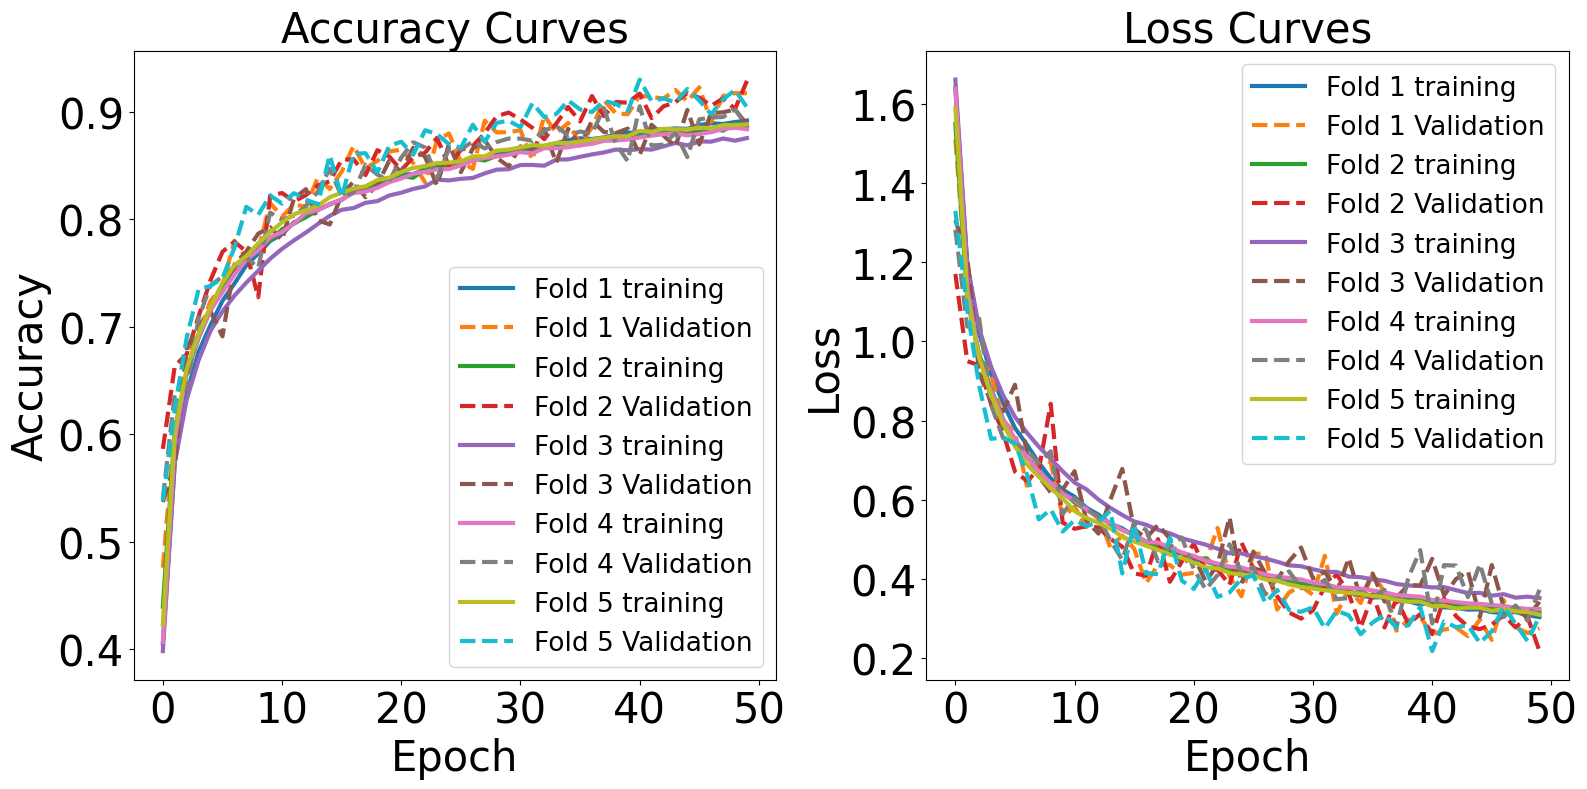

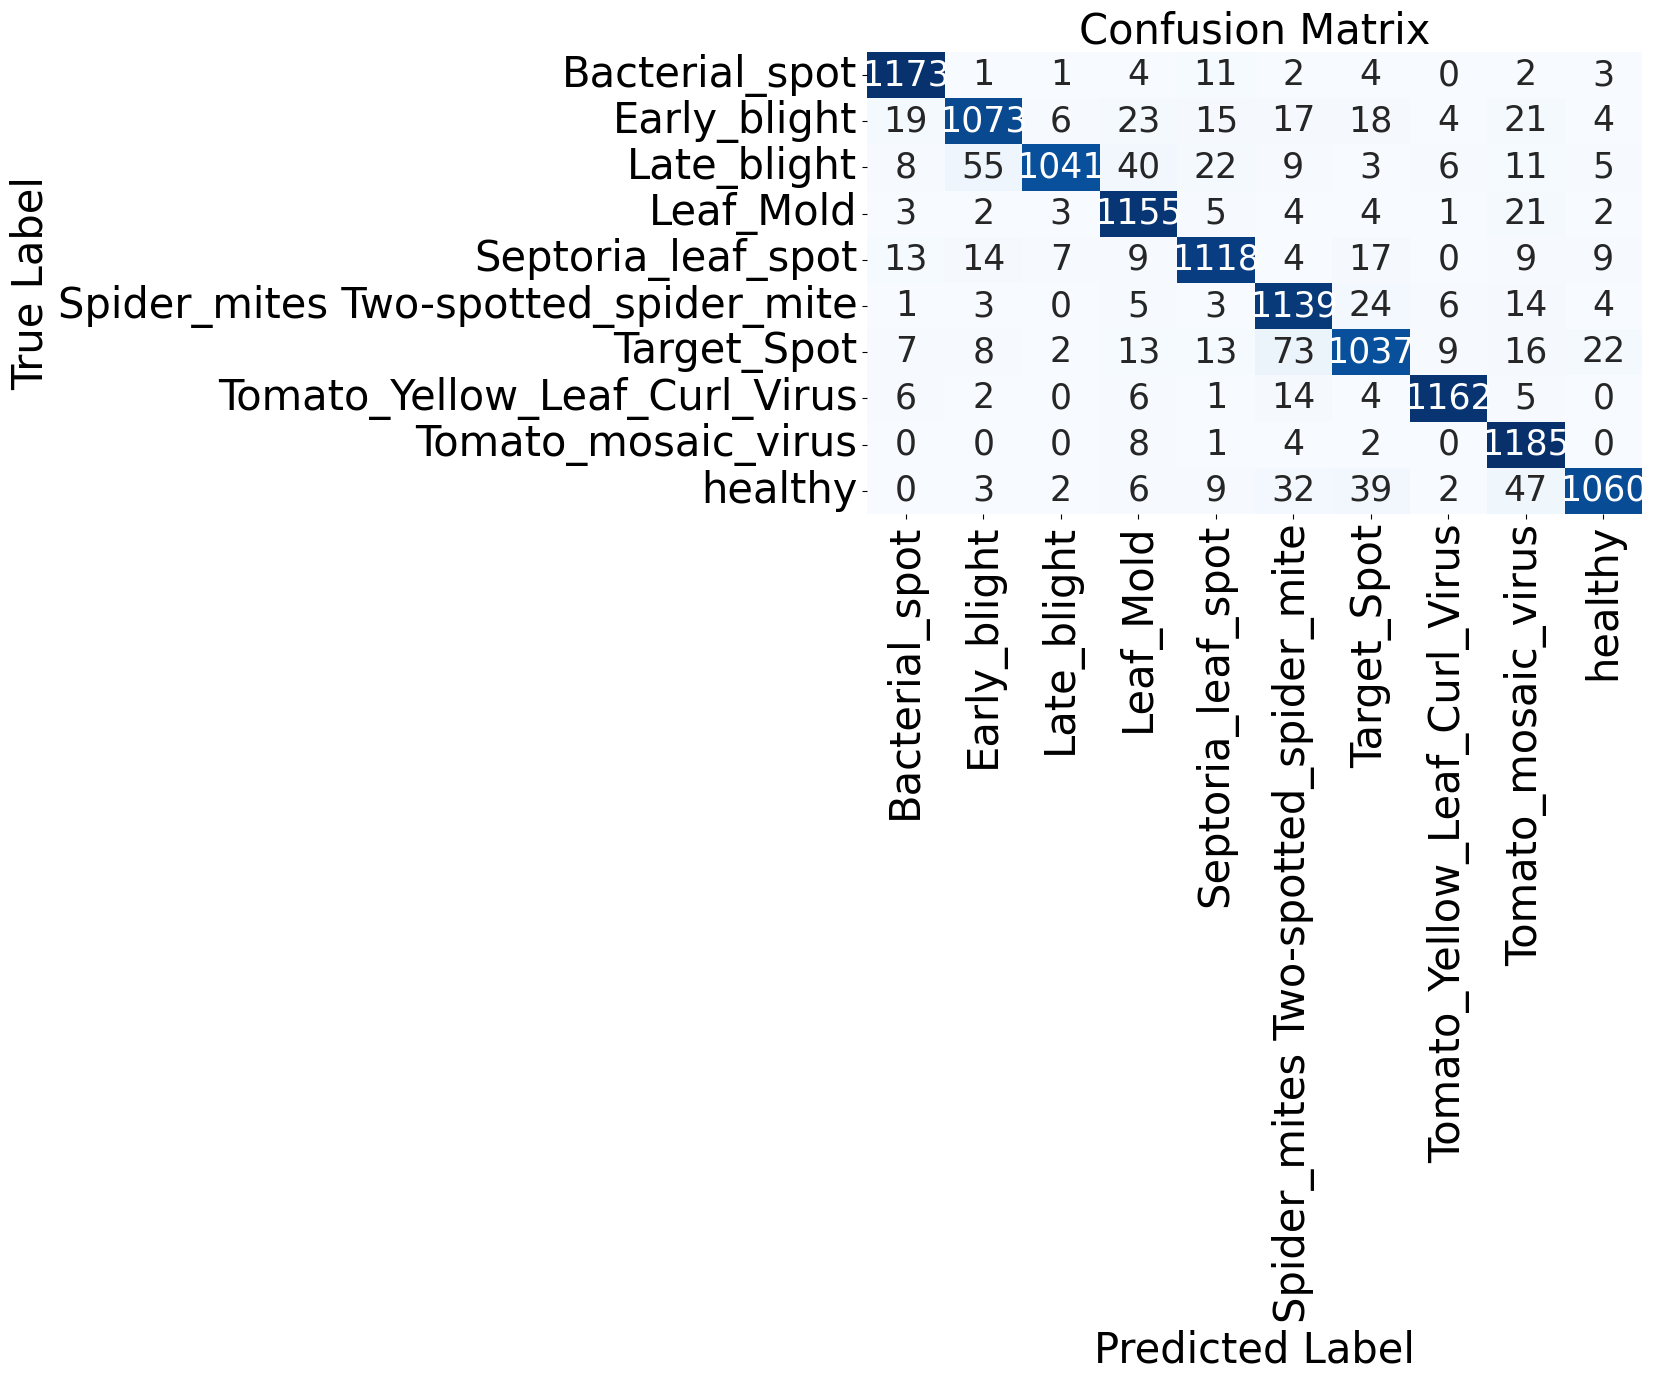

Classification Report
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.95      0.98      0.97      1201
                        Early_blight       0.92      0.89      0.91      1200
                         Late_blight       0.98      0.87      0.92      1200
                           Leaf_Mold       0.91      0.96      0.94      1200
                  Septoria_leaf_spot       0.93      0.93      0.93      1200
Spider_mites Two-spotted_spider_mite       0.88      0.95      0.91      1199
                         Target_Spot       0.90      0.86      0.88      1200
       Tomato_Yellow_Leaf_Curl_Virus       0.98      0.97      0.97      1200
                 Tomato_mosaic_virus       0.89      0.99      0.94      1200
                             healthy       0.96      0.88      0.92      1200

                            accuracy                           0.93     12000
                           macro avg    

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import time

def create_model(input_shape, num_classes=10):
    model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])
    model.build(input_shape=input_shape)

    model.summary()

    return model

def train_model(model, train_generator, X_val, y_val, fold_num, batch_size):
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f'fold_{fold_num}_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    start_time = time.time()  # Start the timer

    # Train the model on the current fold
    history = model.fit(train_generator, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint])

    end_time = time.time()  # Stop the timer
    training_time = end_time - start_time
    print(f"Training time for Fold {fold_num}: {training_time:.2f} seconds")
    return history

def image_generator(directory, batch_size):
    datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0,
        height_shift_range=0,
        shear_range=0.1,
        zoom_range=0,
        horizontal_flip=False,
        vertical_flip=False,
        rescale=1.0 / 255.0  # Normalize the pixel values between 0 and 1
    )

    data_flow = datagen.flow_from_directory(
        directory,
        target_size=(71, 71),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='grayscale',
        shuffle=True
    )

    return data_flow

def load_and_preprocess_images(directory):
    image_data = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = Image.open(image_path).convert('L').resize((71, 71))  # Convert to grayscale and resize the image to 64x64
            image = np.array(image) / 255.0  # Normalize the pixel values between 0 and 1
            image_data.append(image)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels


def split_dataset(image_data, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=test_size, random_state=42)

    # Reshape the input data to include the number of channels (1 in this case since the images are grayscale)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    # Encode the target labels into integer values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Determine the number of classes
    num_classes = len(label_encoder.classes_)

    # One-hot encode the target labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    return X_train, X_test, y_train, y_test, label_encoder

def perform_cross_validation(directory):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    image_data, labels = load_and_preprocess_images(directory)  # Load and preprocess all images and labels
    fold_histories = []
    fold_results = []
    total_training_time = 0
    batch_size = 32  # Set the batch size here

    # Create the label encoder and fit it to all the labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    for fold_num, (train_index, val_index) in enumerate(skf.split(image_data, labels_encoded), 1):  # Use labels_encoded
        X_train, X_val = image_data[train_index], image_data[val_index]
        y_train, y_val = labels_encoded[train_index], labels_encoded[val_index]  # Use encoded labels

        # Create the model (Note: Create the model inside the loop to ensure a fresh model for each fold)
        model = create_model(input_shape=(71, 71, 1), num_classes=len(np.unique(labels_encoded)))

        # Augment training images for this fold
        train_generator = image_generator(directory, batch_size)

        # One-hot encode the target labels for training and validation data
        num_classes = len(np.unique(labels_encoded))
        y_train_onehot = to_categorical(y_train, num_classes=num_classes)
        y_val_onehot = to_categorical(y_val, num_classes=num_classes)

        # Train the model on the current fold
        print(f"Training on Fold {fold_num}...")
        start_time = time.time()  # Start the timer
        history = train_model(model, train_generator, X_val, y_val_onehot, fold_num, batch_size)
        end_time = time.time()  # Stop the timer
        training_time = end_time - start_time
        total_training_time += training_time

        y_pred = np.argmax(model.predict(X_val), axis=1)
        fold_results.append((y_val, y_pred))

        fold_histories.append(history)
        print(f"Training on Fold {fold_num} completed.\n")

    print(f"Total training time for all folds: {total_training_time:.2f} seconds")
    return fold_histories, fold_results



# Plot accuracy and loss curves for each fold

def plot_fold_curves(fold_histories, fold_results):
    num_folds = len(fold_histories)
    plt.figure(figsize=(16, 8))

    # Plot accuracy curves
    plt.subplot(1, 2, 1)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['accuracy'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_accuracy'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Accuracy Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Accuracy', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    # Plot loss curves
    plt.subplot(1, 2, 2)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['loss'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_loss'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Loss Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Loss', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices

    best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
    best_fold_y_true, best_fold_y_pred = fold_results[best_fold_index]

    plt.figure(figsize=(10, 6))
    best_fold_cm = confusion_matrix(best_fold_y_true, best_fold_y_pred)
    sns.heatmap(best_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False, annot_kws={"fontsize": 25})  # Increase the fontsize here
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Predicted Label', fontsize=30)
    plt.ylabel('True Label', fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()


def generate_classification_report(fold_results, label_encoder, best_fold_index):
    y_true, y_pred = fold_results[best_fold_index]
    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    report = classification_report(y_true_labels, y_pred_labels)
    print("Classification Report")
    print(report)
    print("=" * 50)


# Main code
dir = '/content/dataset/train'
image_data, labels = load_and_preprocess_images(dir)
X_train, X_test, y_train, y_test, label_encoder = split_dataset(image_data, labels, test_size=0.2)
fold_histories, fold_results = perform_cross_validation(dir)
best_fold_index = np.argmax([history.history['accuracy'][0] for history in fold_histories])
plot_fold_curves(fold_histories, fold_results)
generate_classification_report(fold_results, label_encoder, best_fold_index)


# VGG 19

80134624/80134624 [==============================] - 4s 0us/step
Training on Fold 1...
Epoch 1/50
1200/1200 [==============================] - ETA: 0s - loss: 2.3209 - accuracy: 0.1002
Epoch 1: val_loss improved from inf to 2.30284, saving model to fold_1_VGG19_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1200/1200 [==============================] - 51s 29ms/step - loss: 2.3209 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0945
Epoch 2/50
1200/1200 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.0986
Epoch 2: val_loss improved from 2.30284 to 2.30266, saving model to fold_1_VGG19_model.h5
1200/1200 [==============================] - 33s 27ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1022
Epoch 3/50
1198/1200 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0989
Epoch 3: val_loss did not improve from 2.30266
1200/1200 [==============================] - 32s 27ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0992
Epoch 4/50
1199/1200 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0986
Epoch 4: val_loss improved from 2.30266 to 2.30264, saving model to fold_1_VGG19_model.h5
1200/1200 [==============================] - 33s 27ms/step - loss: 2.3027 

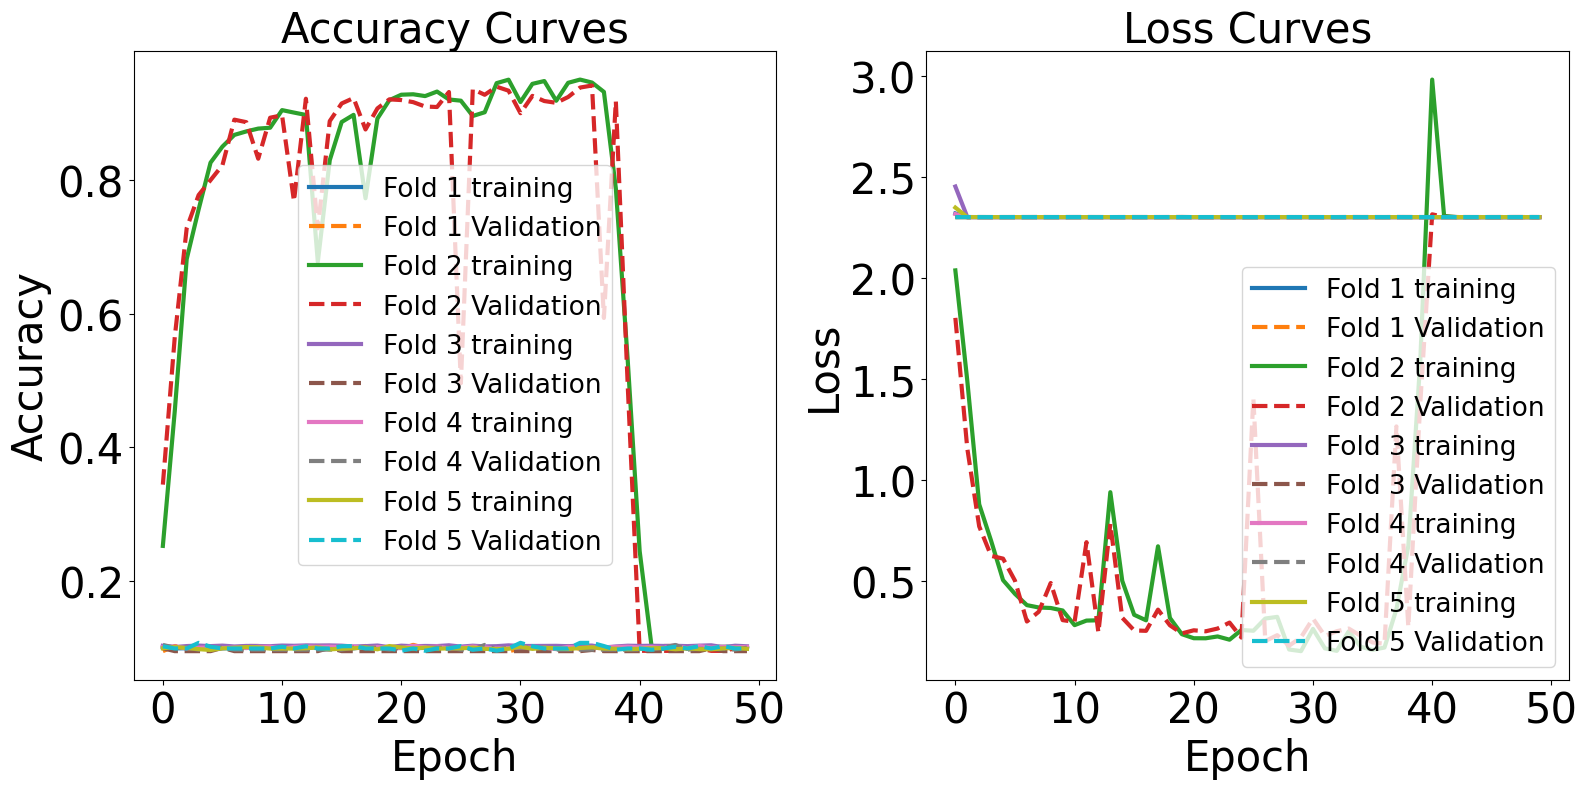

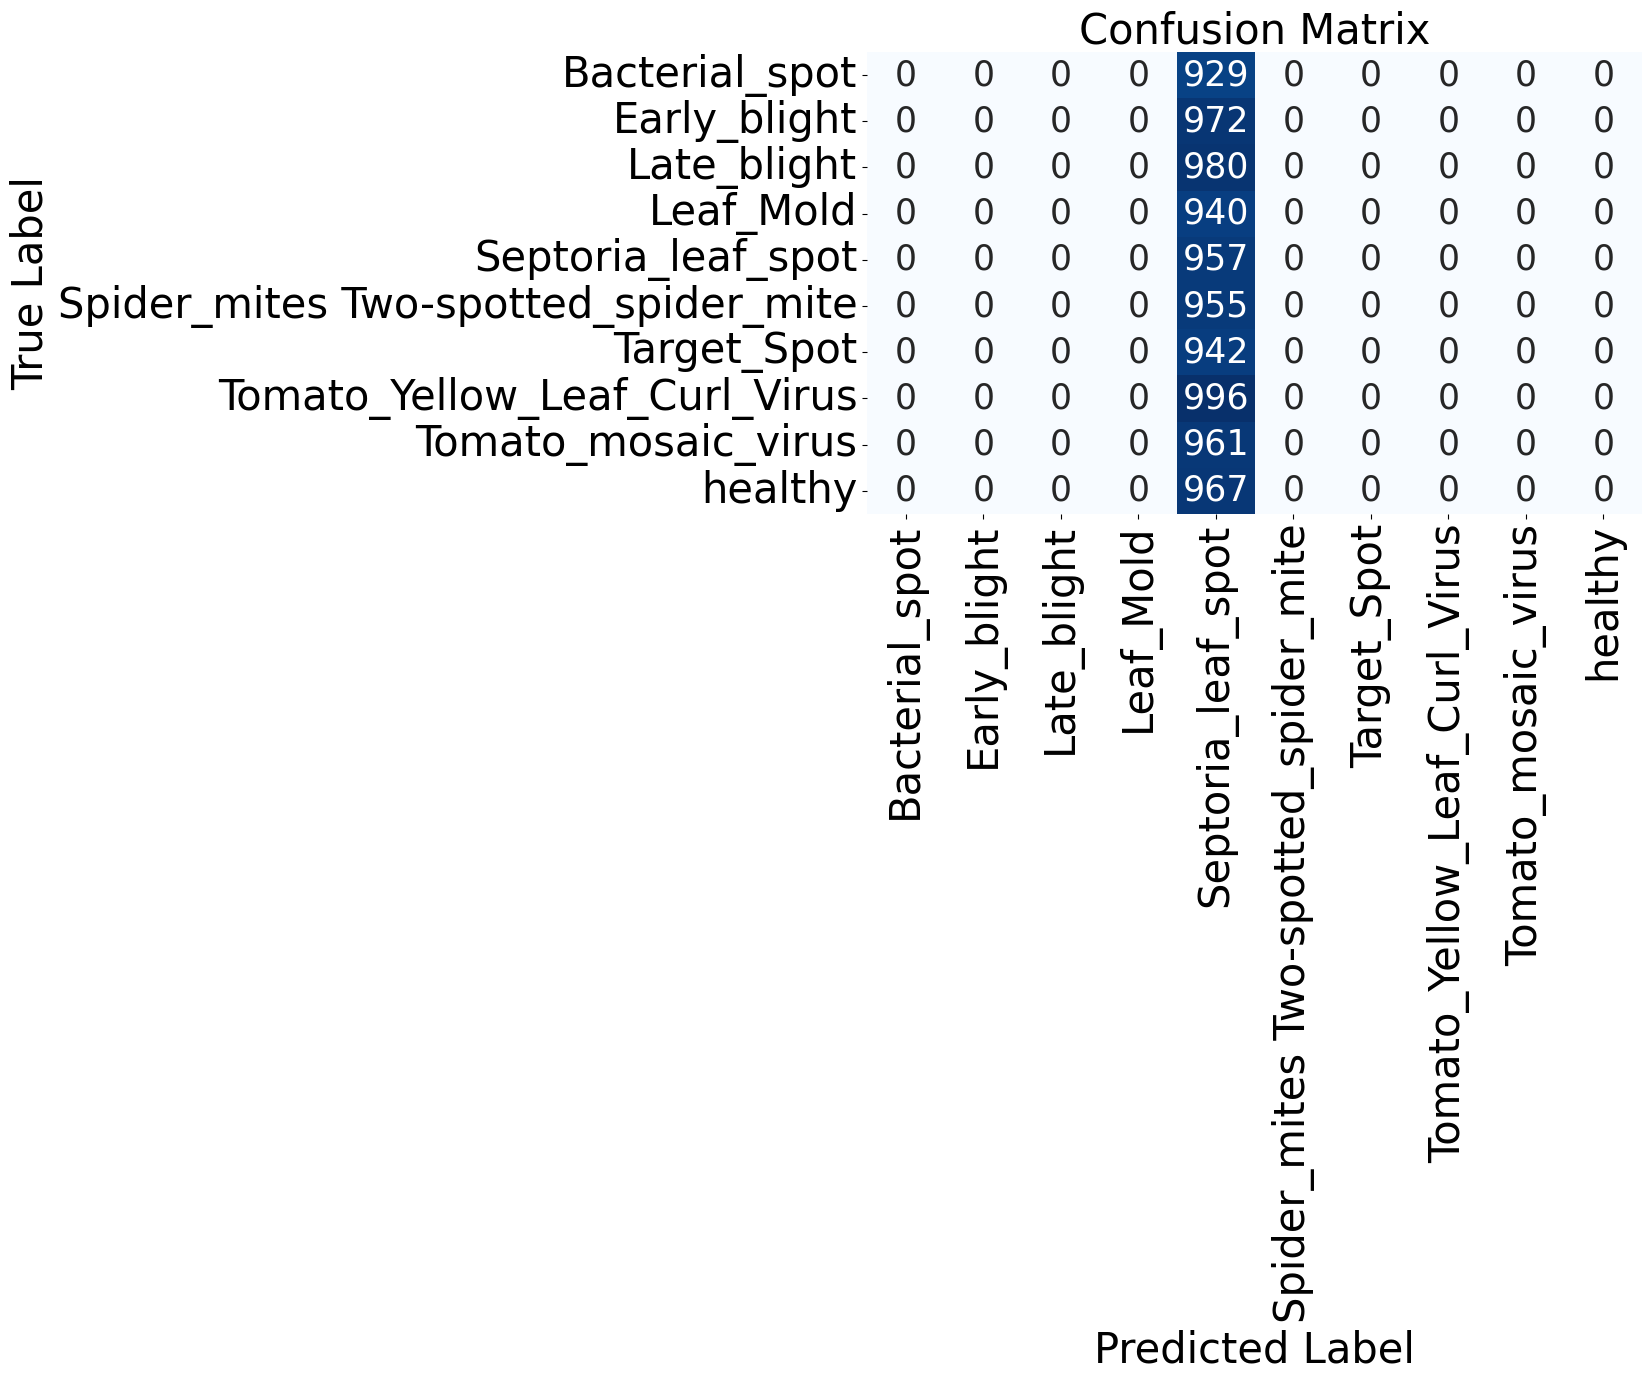

Classification Report
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.00      0.00      0.00       929
                        Early_blight       0.00      0.00      0.00       972
                         Late_blight       0.00      0.00      0.00       980
                           Leaf_Mold       0.00      0.00      0.00       940
                  Septoria_leaf_spot       0.10      1.00      0.18       957
Spider_mites Two-spotted_spider_mite       0.00      0.00      0.00       955
                         Target_Spot       0.00      0.00      0.00       942
       Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00       996
                 Tomato_mosaic_virus       0.00      0.00      0.00       961
                             healthy       0.00      0.00      0.00       967

                            accuracy                           0.10      9599
                           macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

#VGG19

import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
# Create an instance of the VGG19 model

# The 'weights' argument specifies whether you want to use pre-trained weights or not.
# 'imagenet' will load pre-trained weights from ImageNet dataset.
# 'include_top' determines whether to include the fully connected layers at the top of the model.

# You can then use this 'model' for various tasks like feature extraction, fine-tuning, or transfer learning.

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

def create_model(input_shape, num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    return model


def train_model(model, augmented_train_data, X_val, y_val, fold_num):
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f'fold_{fold_num}_vgg19_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    history = model.fit(augmented_train_data, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint])
    return history

def augment_images(X_train, y_train):
    datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                 zoom_range=0.1, horizontal_flip=False, vertical_flip=False)
    datagen.fit(X_train)
    return datagen.flow(X_train, y_train, batch_size=32)

# Load and preprocess the images

def load_and_preprocess_images(directory):
    image_data = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = Image.open(image_path).resize((71, 71))  # Updated size to (n, n)
            image_rgb = image.convert('RGB')  # Convert grayscale to RGB
            image_array = np.array(image_rgb) / 255.0
            image_data.append(image_array)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

# Split the dataset into training and testing sets

def split_dataset(image_data, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=test_size, random_state=42)

    # Reshape the input data to include the channel dimension
    X_train = X_train.reshape(X_train.shape[0], 71, 71, 3)
    X_test = X_test.reshape(X_test.shape[0], 71, 71, 3)

    # Encode the target labels into integer values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Determine the number of classes
    num_classes = len(label_encoder.classes_)

    # One-hot encode the target labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    return X_train, X_test, y_train, y_test, label_encoder

# Perform five-fold cross-validation and train the model for each fold


def perform_cross_validation(X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_histories = []
    fold_results = []

    total_training_time = 0.0  # Track the total training time

    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create the  model
        input_shape = X_train_fold.shape[1:]
        num_classes = y_train_fold.shape[1]
        model = create_model(input_shape=input_shape, num_classes=num_classes)

        # Train the model on the current fold
        print(f"Training on Fold {fold_num}...")
        start_time = time.time()
        model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
        checkpoint = ModelCheckpoint(f'fold_{fold_num}_VGG19_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=50, callbacks=[checkpoint])
        end_time = time.time()
        fold_training_time = end_time - start_time
        total_training_time += fold_training_time

        y_pred = np.argmax(model.predict(X_val_fold), axis=1)
        y_true = np.argmax(y_val_fold, axis=1)
        fold_results.append((y_true, y_pred))

        fold_histories.append(history)
        print(f"Training on Fold {fold_num} completed. Training time: {fold_training_time:.2f} seconds.\n")

    print(f"Total training time: {total_training_time:.2f} seconds.")

    return fold_histories, fold_results



# Plot accuracy and loss curves for each fold

def plot_fold_curves(fold_histories, fold_results):
    num_folds = len(fold_histories)
    plt.figure(figsize=(16, 8))

    # Plot accuracy curves
    plt.subplot(1, 2, 1)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['accuracy'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_accuracy'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Accuracy Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Accuracy', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    # Plot loss curves
    plt.subplot(1, 2, 2)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['loss'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_loss'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Loss Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Loss', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices

    best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
    best_fold_y_true, best_fold_y_pred = fold_results[best_fold_index]

    plt.figure(figsize=(10, 6))
    best_fold_cm = confusion_matrix(best_fold_y_true, best_fold_y_pred)
    sns.heatmap(best_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False, annot_kws={"fontsize": 25})  # Increase the fontsize here
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Predicted Label', fontsize=30)
    plt.ylabel('True Label', fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()


def generate_classification_report(fold_results, label_encoder, best_fold_index):
    y_true, y_pred = fold_results[best_fold_index]
    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    report = classification_report(y_true_labels, y_pred_labels)
    print("Classification Report")
    print(report)
    print("=" * 50)


# Main code

dir = '/content/dataset/train'
image_data, labels = load_and_preprocess_images(dir)
X_train, X_test, y_train, y_test, label_encoder = split_dataset(image_data, labels, test_size=0.2)
fold_histories, fold_results = perform_cross_validation(X_train, y_train)
best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
plot_fold_curves(fold_histories, fold_results)
generate_classification_report(fold_results, label_encoder, best_fold_index)



# Xception with 99% precision recall and f1 and Accuracy

83683744/83683744 [==============================] - 3s 0us/step
Training on Fold 1...
Epoch 1/50
1200/1200 [==============================] - ETA: 0s - loss: 0.3556 - accuracy: 0.8844
Epoch 1: val_loss improved from inf to 0.27758, saving model to fold_1_Xception_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1200/1200 [==============================] - 77s 40ms/step - loss: 0.3556 - accuracy: 0.8844 - val_loss: 0.2776 - val_accuracy: 0.9079
Epoch 2/50
1199/1200 [============================>.] - ETA: 0s - loss: 0.1312 - accuracy: 0.9567
Epoch 2: val_loss improved from 0.27758 to 0.19885, saving model to fold_1_Xception_model.h5
1200/1200 [==============================] - 45s 38ms/step - loss: 0.1312 - accuracy: 0.9566 - val_loss: 0.1988 - val_accuracy: 0.9341
Epoch 3/50
1199/1200 [============================>.] - ETA: 0s - loss: 0.0911 - accuracy: 0.9704
Epoch 3: val_loss improved from 0.19885 to 0.15724, saving model to fold_1_Xception_model.h5
1200/1200 [==============================] - 45s 38ms/step - loss: 0.0911 - accuracy: 0.9704 - val_loss: 0.1572 - val_accuracy: 0.9479
Epoch 4/50
1199/1200 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9735
Epoch 4: val_loss did not improve from 0.15724
1200/1200 [==============================] - 45s 37ms/step - loss: 0

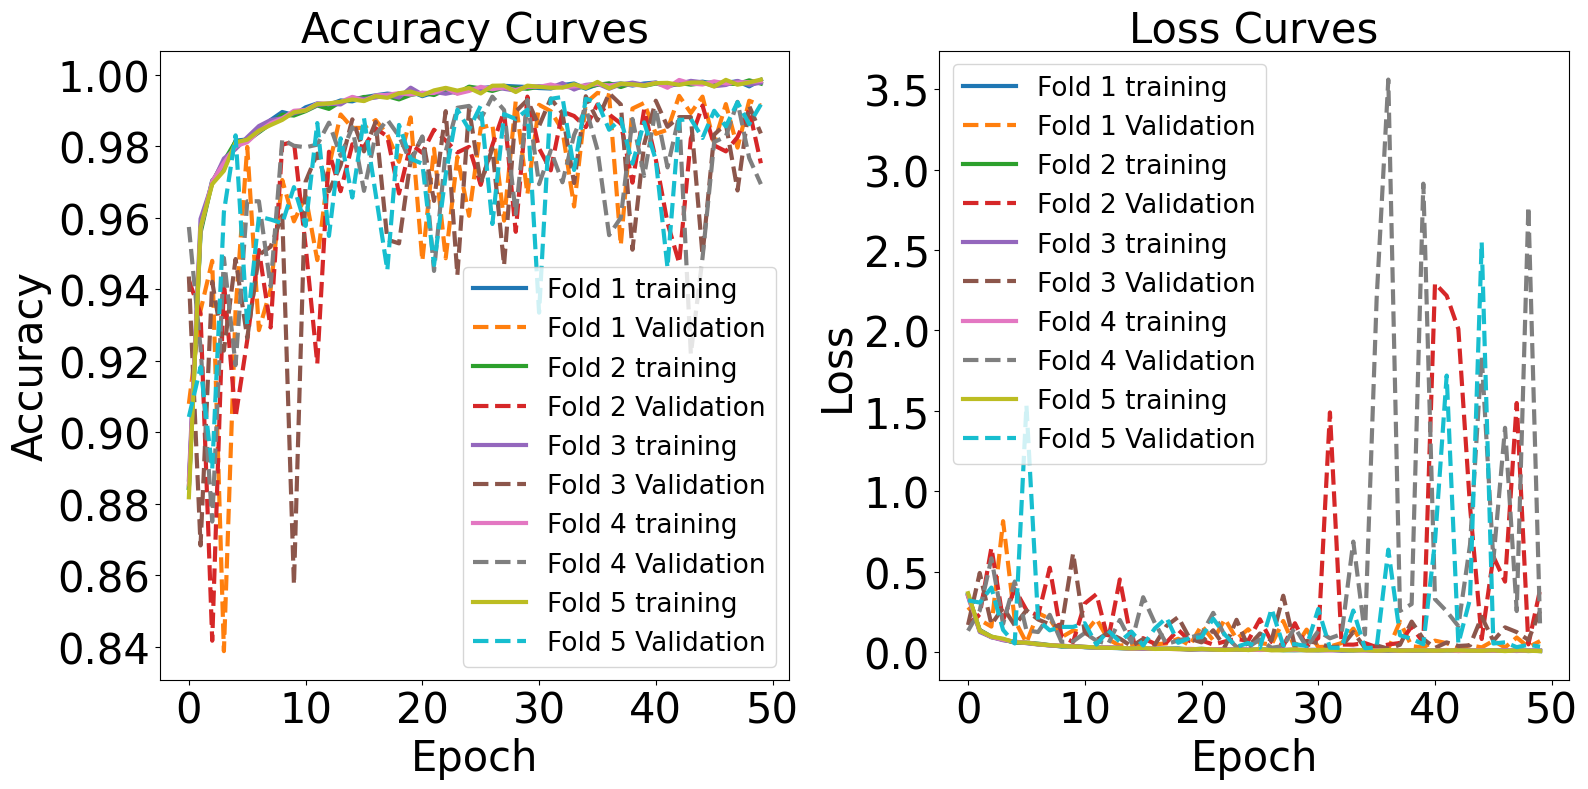

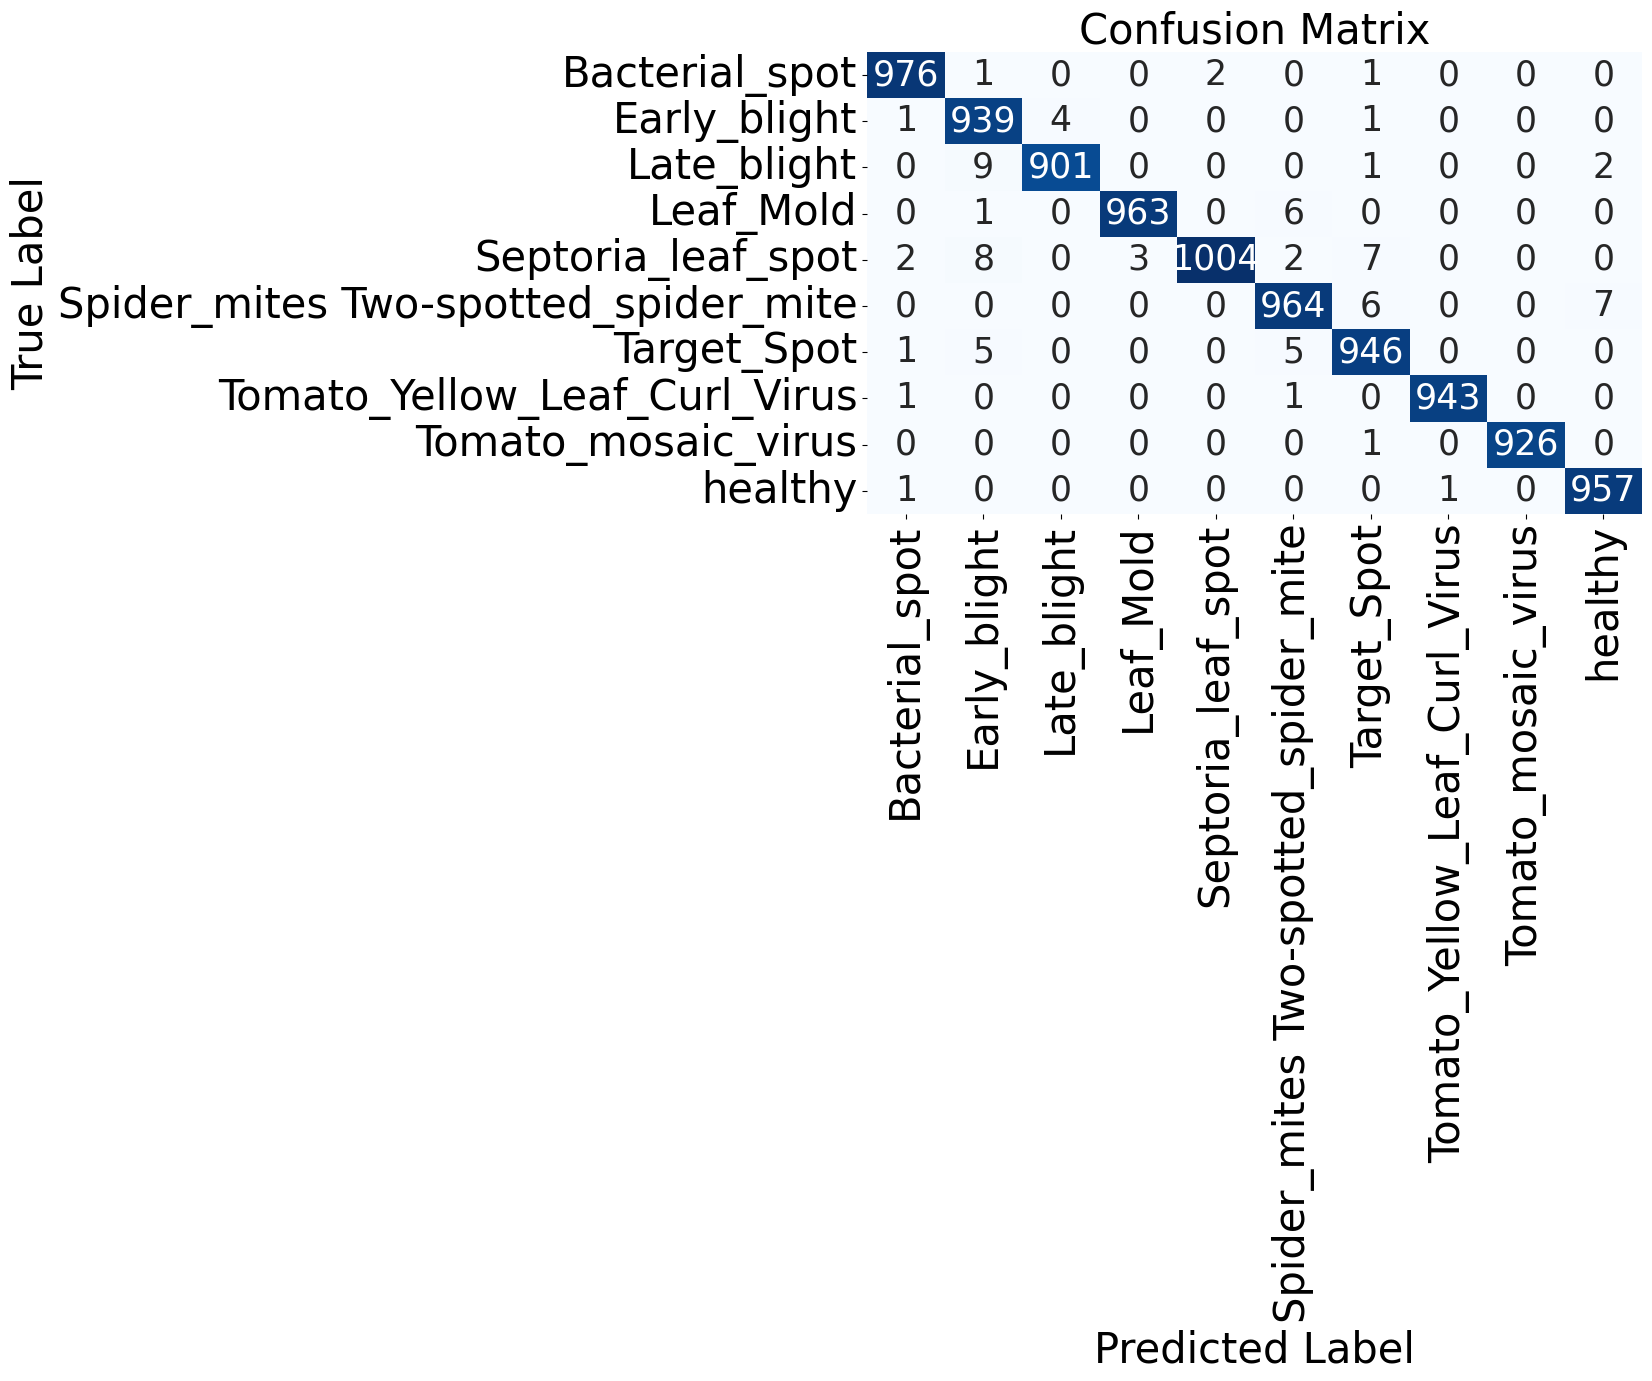

Classification Report
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.99      1.00      0.99       980
                        Early_blight       0.98      0.99      0.98       945
                         Late_blight       1.00      0.99      0.99       913
                           Leaf_Mold       1.00      0.99      0.99       970
                  Septoria_leaf_spot       1.00      0.98      0.99      1026
Spider_mites Two-spotted_spider_mite       0.99      0.99      0.99       977
                         Target_Spot       0.98      0.99      0.99       957
       Tomato_Yellow_Leaf_Curl_Virus       1.00      1.00      1.00       945
                 Tomato_mosaic_virus       1.00      1.00      1.00       927
                             healthy       0.99      1.00      0.99       959

                            accuracy                           0.99      9599
                           macro avg    

In [ ]:

#Xception

import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import Xception


from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

def create_model(input_shape, num_classes):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    return model


def train_model(model, augmented_train_data, X_val, y_val, fold_num):
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f'fold_{fold_num}_Xception_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    history = model.fit(augmented_train_data, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint])
    return history

def augment_images(X_train, y_train):
    datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                 zoom_range=0.1, horizontal_flip=False, vertical_flip=False)
    datagen.fit(X_train)
    return datagen.flow(X_train, y_train, batch_size=32)

# Load and preprocess the images

def load_and_preprocess_images(directory):
    image_data = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = Image.open(image_path).resize((71, 71))  # Updated size to (224, 224)
            image_rgb = image.convert('RGB')  # Convert grayscale to RGB
            image_array = np.array(image_rgb) / 255.0
            image_data.append(image_array)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

# Split the dataset into training and testing sets

def split_dataset(image_data, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=test_size, random_state=42)

    # Reshape the input data to include the channel dimension
    X_train = X_train.reshape(X_train.shape[0], 71, 71, 3)
    X_test = X_test.reshape(X_test.shape[0], 71, 71, 3)

    # Encode the target labels into integer values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Determine the number of classes
    num_classes = len(label_encoder.classes_)

    # One-hot encode the target labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    return X_train, X_test, y_train, y_test, label_encoder

# Perform five-fold cross-validation and train the model for each fold


def perform_cross_validation(X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_histories = []
    fold_results = []

    total_training_time = 0.0  # Track the total training time

    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create the  model
        input_shape = X_train_fold.shape[1:]
        num_classes = y_train_fold.shape[1]
        model = create_model(input_shape=input_shape, num_classes=num_classes)

        # Train the model on the current fold
        print(f"Training on Fold {fold_num}...")
        start_time = time.time()
        model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
        checkpoint = ModelCheckpoint(f'fold_{fold_num}_Xception_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=50, callbacks=[checkpoint])
        end_time = time.time()
        fold_training_time = end_time - start_time
        total_training_time += fold_training_time

        y_pred = np.argmax(model.predict(X_val_fold), axis=1)
        y_true = np.argmax(y_val_fold, axis=1)
        fold_results.append((y_true, y_pred))

        fold_histories.append(history)
        print(f"Training on Fold {fold_num} completed. Training time: {fold_training_time:.2f} seconds.\n")

    print(f"Total training time: {total_training_time:.2f} seconds.")

    return fold_histories, fold_results



# Plot accuracy and loss curves for each fold

def plot_fold_curves(fold_histories, fold_results):
    num_folds = len(fold_histories)
    plt.figure(figsize=(16, 8))

    # Plot accuracy curves
    plt.subplot(1, 2, 1)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['accuracy'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_accuracy'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Accuracy Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Accuracy', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    # Plot loss curves
    plt.subplot(1, 2, 2)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['loss'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_loss'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Loss Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Loss', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices

    best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
    best_fold_y_true, best_fold_y_pred = fold_results[best_fold_index]

    plt.figure(figsize=(10, 6))
    best_fold_cm = confusion_matrix(best_fold_y_true, best_fold_y_pred)
    sns.heatmap(best_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False, annot_kws={"fontsize": 25})  # Increase the fontsize here
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Predicted Label', fontsize=30)
    plt.ylabel('True Label', fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()


def generate_classification_report(fold_results, label_encoder, best_fold_index):
    y_true, y_pred = fold_results[best_fold_index]
    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    report = classification_report(y_true_labels, y_pred_labels)
    print("Classification Report")
    print(report)
    print("=" * 50)


# Main code

dir = '/content/dataset/train'
image_data, labels = load_and_preprocess_images(dir)
X_train, X_test, y_train, y_test, label_encoder = split_dataset(image_data, labels, test_size=0.2)
fold_histories, fold_results = perform_cross_validation(X_train, y_train)
best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
plot_fold_curves(fold_histories, fold_results)
generate_classification_report(fold_results, label_encoder, best_fold_index)



# Resnet 50

94765736/94765736 [==============================] - 3s 0us/step
Training on Fold 1...
Epoch 1/50
1200/1200 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.8327
Epoch 1: val_loss improved from inf to 0.73822, saving model to fold_1_resnet50_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1200/1200 [==============================] - 94s 47ms/step - loss: 0.5186 - accuracy: 0.8327 - val_loss: 0.7382 - val_accuracy: 0.7553
Epoch 2/50
1199/1200 [============================>.] - ETA: 0s - loss: 0.2099 - accuracy: 0.9288
Epoch 2: val_loss improved from 0.73822 to 0.35348, saving model to fold_1_resnet50_model.h5
1200/1200 [==============================] - 54s 45ms/step - loss: 0.2098 - accuracy: 0.9288 - val_loss: 0.3535 - val_accuracy: 0.8843
Epoch 3/50
1200/1200 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9422
Epoch 3: val_loss did not improve from 0.35348
1200/1200 [==============================] - 53s 44ms/step - loss: 0.1746 - accuracy: 0.9422 - val_loss: 0.4574 - val_accuracy: 0.8529
Epoch 4/50
1200/1200 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.9555
Epoch 4: val_loss did not improve from 0.35348
1200/1200 [==============================] - 54s 45ms/step - loss: 0.1402 - accuracy: 0.9555 - val_loss: 0.4546 - 

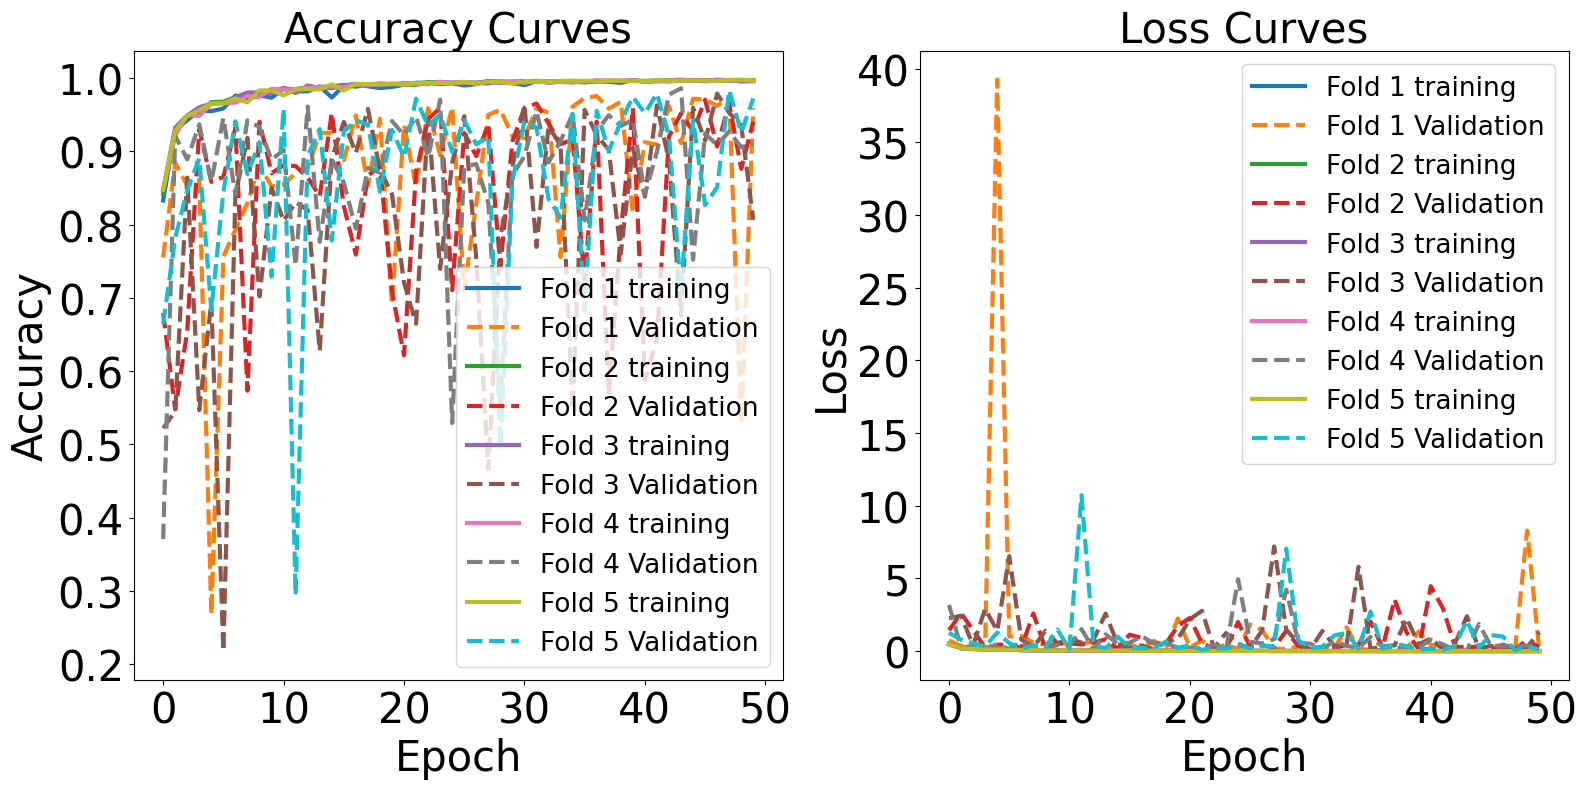

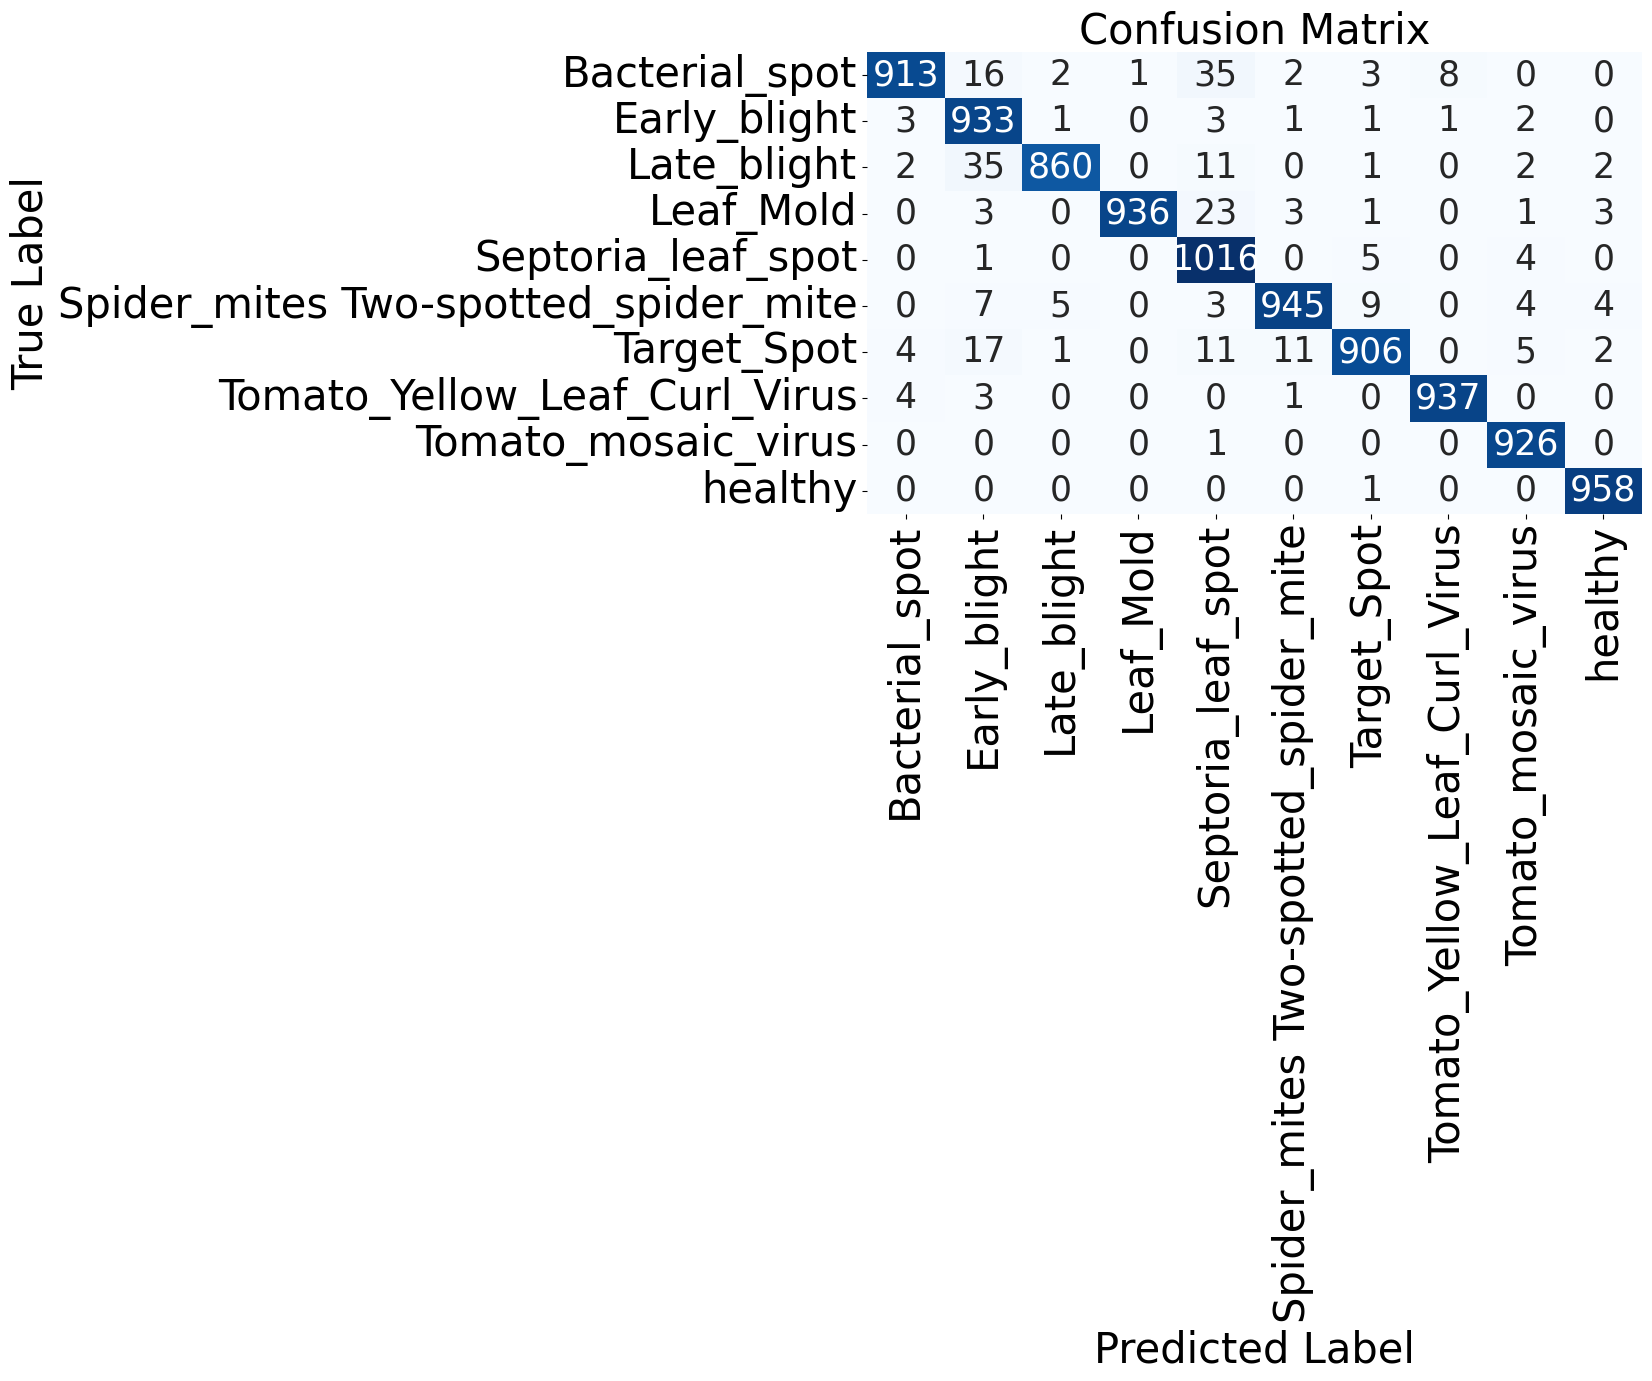

Classification Report
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.99      0.93      0.96       980
                        Early_blight       0.92      0.99      0.95       945
                         Late_blight       0.99      0.94      0.97       913
                           Leaf_Mold       1.00      0.96      0.98       970
                  Septoria_leaf_spot       0.92      0.99      0.95      1026
Spider_mites Two-spotted_spider_mite       0.98      0.97      0.97       977
                         Target_Spot       0.98      0.95      0.96       957
       Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       945
                 Tomato_mosaic_virus       0.98      1.00      0.99       927
                             healthy       0.99      1.00      0.99       959

                            accuracy                           0.97      9599
                           macro avg    

In [ ]:

# ResNet50

import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import InceptionResNetV2

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

def create_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(num_classes, activation='softmax'))
    return model


def train_model(model, augmented_train_data, X_val, y_val, fold_num):
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f'fold_{fold_num}_resnet50_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    history = model.fit(augmented_train_data, validation_data=(X_val, y_val), epochs=50, callbacks=[checkpoint])
    return history

def augment_images(X_train, y_train):
    datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                                 zoom_range=0.1, horizontal_flip=False, vertical_flip=False)
    datagen.fit(X_train)
    return datagen.flow(X_train, y_train, batch_size=32)

# Load and preprocess the images

def load_and_preprocess_images(directory):
    image_data = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = Image.open(image_path).resize((71, 71))  # Updated size to (224, 224)
            image_rgb = image.convert('RGB')  # Convert grayscale to RGB
            image_array = np.array(image_rgb) / 255.0
            image_data.append(image_array)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

# Split the dataset into training and testing sets

def split_dataset(image_data, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=test_size, random_state=42)

    # Reshape the input data to include the channel dimension
    X_train = X_train.reshape(X_train.shape[0], 71, 71, 3)
    X_test = X_test.reshape(X_test.shape[0], 71, 71, 3)

    # Encode the target labels into integer values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # Determine the number of classes
    num_classes = len(label_encoder.classes_)

    # One-hot encode the target labels
    y_train = to_categorical(y_train, num_classes=num_classes)
    y_test = to_categorical(y_test, num_classes=num_classes)

    return X_train, X_test, y_train, y_test, label_encoder

# Perform five-fold cross-validation and train the model for each fold


def perform_cross_validation(X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_histories = []
    fold_results = []

    total_training_time = 0.0  # Track the total training time

    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create the  model
        input_shape = X_train_fold.shape[1:]
        num_classes = y_train_fold.shape[1]
        model = create_model(input_shape=input_shape, num_classes=num_classes)

        # Train the model on the current fold
        print(f"Training on Fold {fold_num}...")
        start_time = time.time()
        model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
        checkpoint = ModelCheckpoint(f'fold_{fold_num}_resnet50_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=50, callbacks=[checkpoint])
        end_time = time.time()
        fold_training_time = end_time - start_time
        total_training_time += fold_training_time

        y_pred = np.argmax(model.predict(X_val_fold), axis=1)
        y_true = np.argmax(y_val_fold, axis=1)
        fold_results.append((y_true, y_pred))

        fold_histories.append(history)
        print(f"Training on Fold {fold_num} completed. Training time: {fold_training_time:.2f} seconds.\n")

    print(f"Total training time: {total_training_time:.2f} seconds.")

    return fold_histories, fold_results



# Plot accuracy and loss curves for each fold

def plot_fold_curves(fold_histories, fold_results):
    num_folds = len(fold_histories)
    plt.figure(figsize=(16, 8))

    # Plot accuracy curves
    plt.subplot(1, 2, 1)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['accuracy'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_accuracy'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Accuracy Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Accuracy', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    # Plot loss curves
    plt.subplot(1, 2, 2)
    for fold_num, history in enumerate(fold_histories, 1):
        plt.plot(history.history['loss'], label=f'Fold {fold_num} training', linewidth=3)
        plt.plot(history.history['val_loss'], '--', label=f'Fold {fold_num} Validation', linewidth=3)
    plt.title('Loss Curves', fontsize=30)
    plt.xlabel('Epoch', fontsize=30)
    plt.ylabel('Loss', fontsize=30)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.legend(fontsize=19)

    plt.tight_layout()
    plt.show()

    # Plot confusion matrices

    best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
    best_fold_y_true, best_fold_y_pred = fold_results[best_fold_index]

    plt.figure(figsize=(10, 6))
    best_fold_cm = confusion_matrix(best_fold_y_true, best_fold_y_pred)
    sns.heatmap(best_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False, annot_kws={"fontsize": 25})  # Increase the fontsize here
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Predicted Label', fontsize=30)
    plt.ylabel('True Label', fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()


def generate_classification_report(fold_results, label_encoder, best_fold_index):
    y_true, y_pred = fold_results[best_fold_index]
    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    report = classification_report(y_true_labels, y_pred_labels)
    print("Classification Report")
    print(report)
    print("=" * 50)


# Main code

dir = '/content/dataset/train'
image_data, labels = load_and_preprocess_images(dir)
X_train, X_test, y_train, y_test, label_encoder = split_dataset(image_data, labels, test_size=0.2)
fold_histories, fold_results = perform_cross_validation(X_train, y_train)
best_fold_index = np.argmax([history.history['val_accuracy'][-1] for history in fold_histories])
plot_fold_curves(fold_histories, fold_results)
generate_classification_report(fold_results, label_encoder, best_fold_index)



# Random Forest

Training on Fold 1...
Training on Fold 1 completed. Training time: 382.71 seconds.

Training on Fold 2...
Training on Fold 2 completed. Training time: 379.74 seconds.

Training on Fold 3...
Training on Fold 3 completed. Training time: 380.74 seconds.

Training on Fold 4...
Training on Fold 4 completed. Training time: 383.93 seconds.

Training on Fold 5...
Training on Fold 5 completed. Training time: 387.57 seconds.



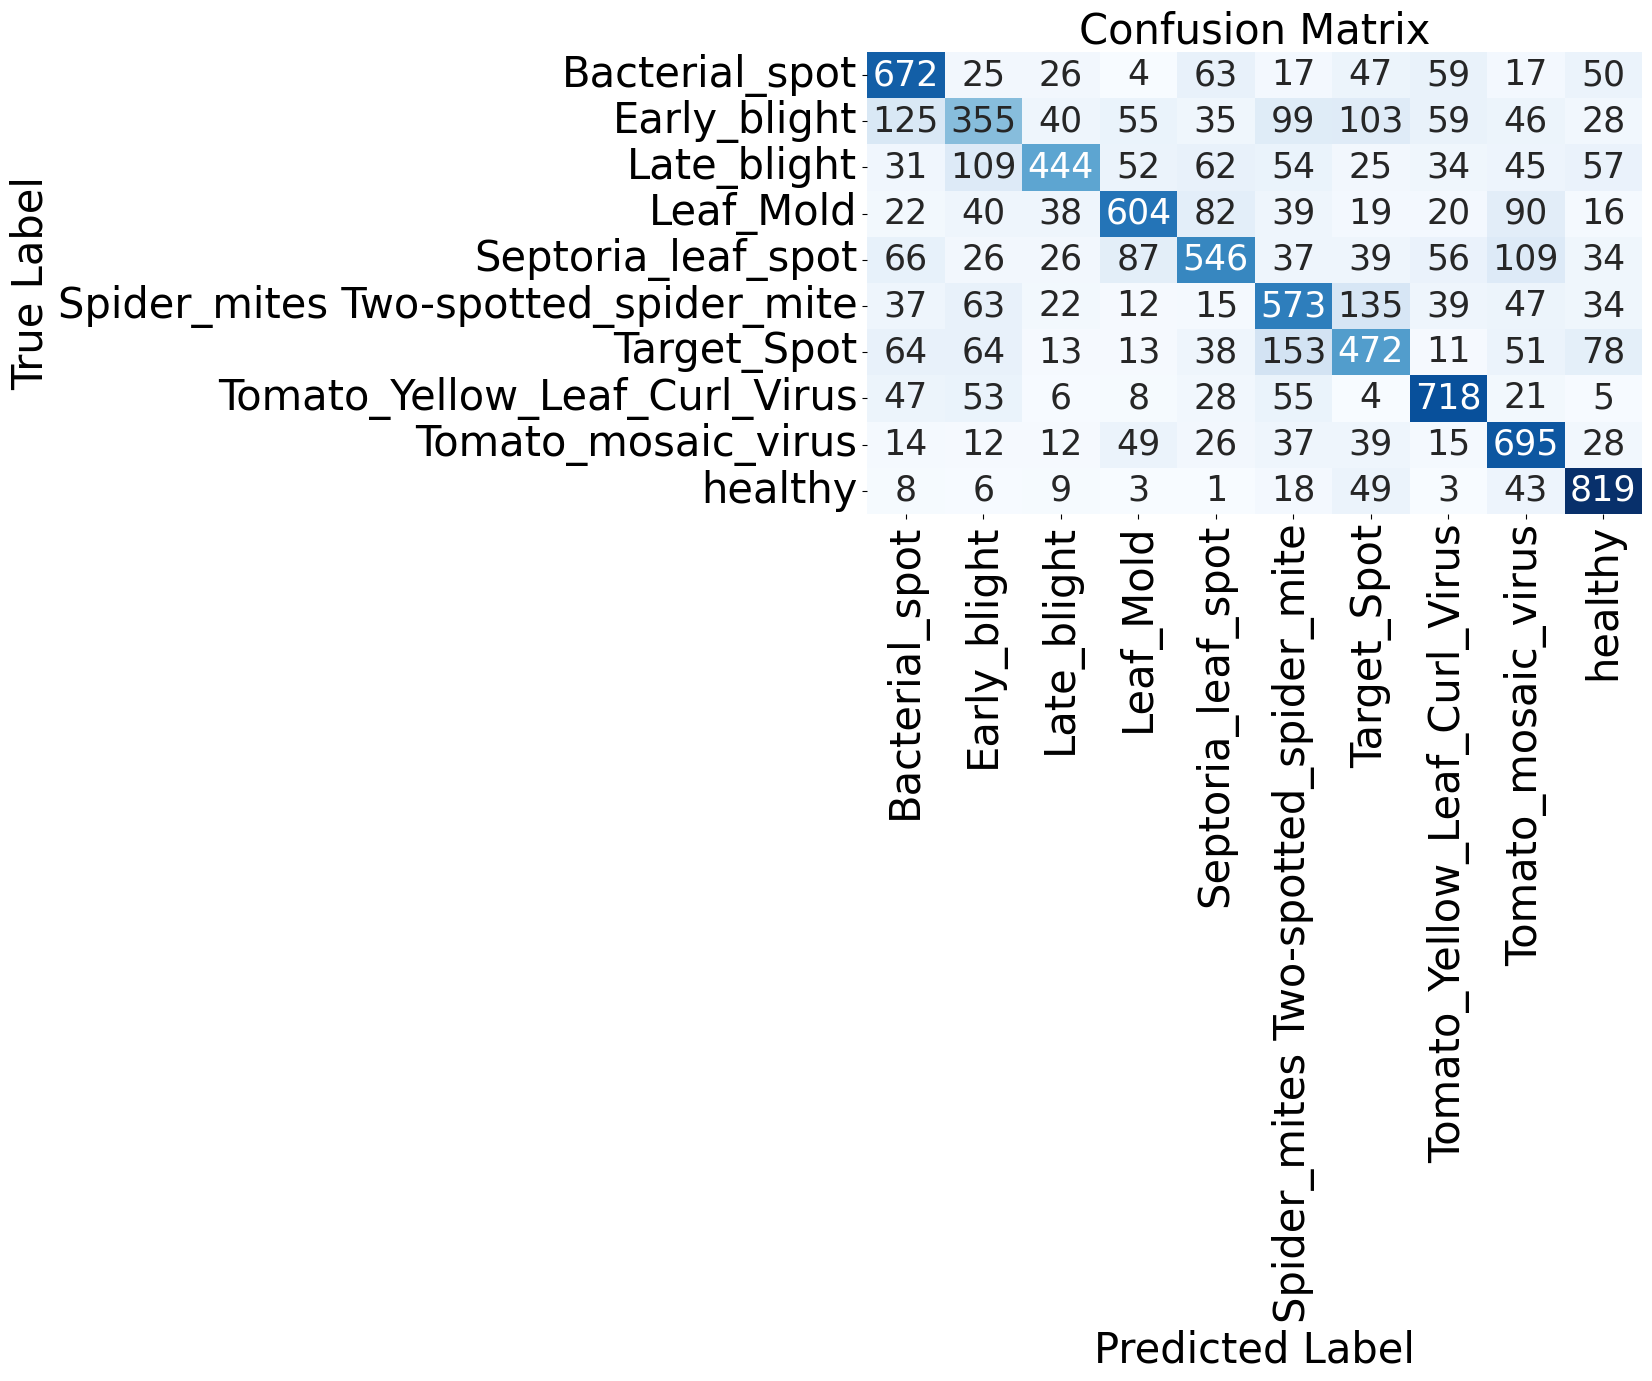

Classification Report
                                      precision    recall  f1-score   support

                      Bacterial_spot       0.62      0.69      0.65       980
                        Early_blight       0.47      0.38      0.42       945
                         Late_blight       0.70      0.49      0.57       913
                           Leaf_Mold       0.68      0.62      0.65       970
                  Septoria_leaf_spot       0.61      0.53      0.57      1026
Spider_mites Two-spotted_spider_mite       0.53      0.59      0.56       977
                         Target_Spot       0.51      0.49      0.50       957
       Tomato_Yellow_Leaf_Curl_Virus       0.71      0.76      0.73       945
                 Tomato_mosaic_virus       0.60      0.75      0.66       927
                             healthy       0.71      0.85      0.78       959

                            accuracy                           0.61      9599
                           macro avg    

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

def create_model():
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    return model

def train_model(model, X_train, y_train, fold_num):
    model.fit(X_train, y_train)
    return model

# Load and preprocess the images

def load_and_preprocess_images(directory):
    image_data = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = Image.open(image_path).resize((71, 71))  # Updated size to (71, 71)
            image_rgb = image.convert('RGB')  # Convert grayscale to RGB
            image_array = np.array(image_rgb) / 255.0
            image_data.append(image_array)
            labels.append(label)

    image_data = np.array(image_data)
    labels = np.array(labels)
    return image_data, labels

# Split the dataset into training and testing sets

def split_dataset(image_data, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=test_size, random_state=42)

    # Reshape the input data to include the channel dimension
    X_train = X_train.reshape(X_train.shape[0], 71 * 71 * 3)
    X_test = X_test.reshape(X_test.shape[0], 71 * 71 * 3)

    # Encode the target labels into integer values
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    return X_train, X_test, y_train, y_test, label_encoder

# Perform five-fold cross-validation and train the model for each fold

def perform_cross_validation(X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_results = []

    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train), 1):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create the Random Forest model
        model = create_model()

        # Train the model on the current fold
        print(f"Training on Fold {fold_num}...")
        start_time = time.time()
        model = train_model(model, X_train_fold, y_train_fold, fold_num)
        end_time = time.time()
        fold_training_time = end_time - start_time

        y_pred = model.predict(X_val_fold)
        fold_results.append((y_val_fold, y_pred))

        print(f"Training on Fold {fold_num} completed. Training time: {fold_training_time:.2f} seconds.\n")

    return fold_results

# Plot confusion matrices

def plot_fold_curves(fold_results, label_encoder):
    best_fold_index = np.argmax([accuracy_score(y_true, y_pred) for y_true, y_pred in fold_results])

    plt.figure(figsize=(10, 6))
    best_fold_cm = confusion_matrix(fold_results[best_fold_index][0], fold_results[best_fold_index][1])
    sns.heatmap(best_fold_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, cbar=False, annot_kws={"fontsize": 25})
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Predicted Label', fontsize=30)
    plt.ylabel('True Label', fontsize=30)
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()

# Generate a classification report

def generate_classification_report(fold_results, label_encoder):
    best_fold_index = np.argmax([accuracy_score(y_true, y_pred) for y_true, y_pred in fold_results])
    y_true, y_pred = fold_results[best_fold_index]
    y_true_labels = label_encoder.inverse_transform(y_true)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    report = classification_report(y_true_labels, y_pred_labels)
    print("Classification Report")
    print(report)
    print("=" * 50)

# Main code

dir = '/content/dataset/train'
image_data, labels = load_and_preprocess_images(dir)
X_train, X_test, y_train, y_test, label_encoder = split_dataset(image_data, labels, test_size=0.2)
fold_results = perform_cross_validation(X_train, y_train)
plot_fold_curves(fold_results, label_encoder)
generate_classification_report(fold_results, label_encoder)


# Xception and Random Forest

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 6s 18ms/step
Test accuracy: 0.5860
Precision: 0.5874
Recall: 0.5840
F1 Score: 0.5857
Plotting the confusion matrix


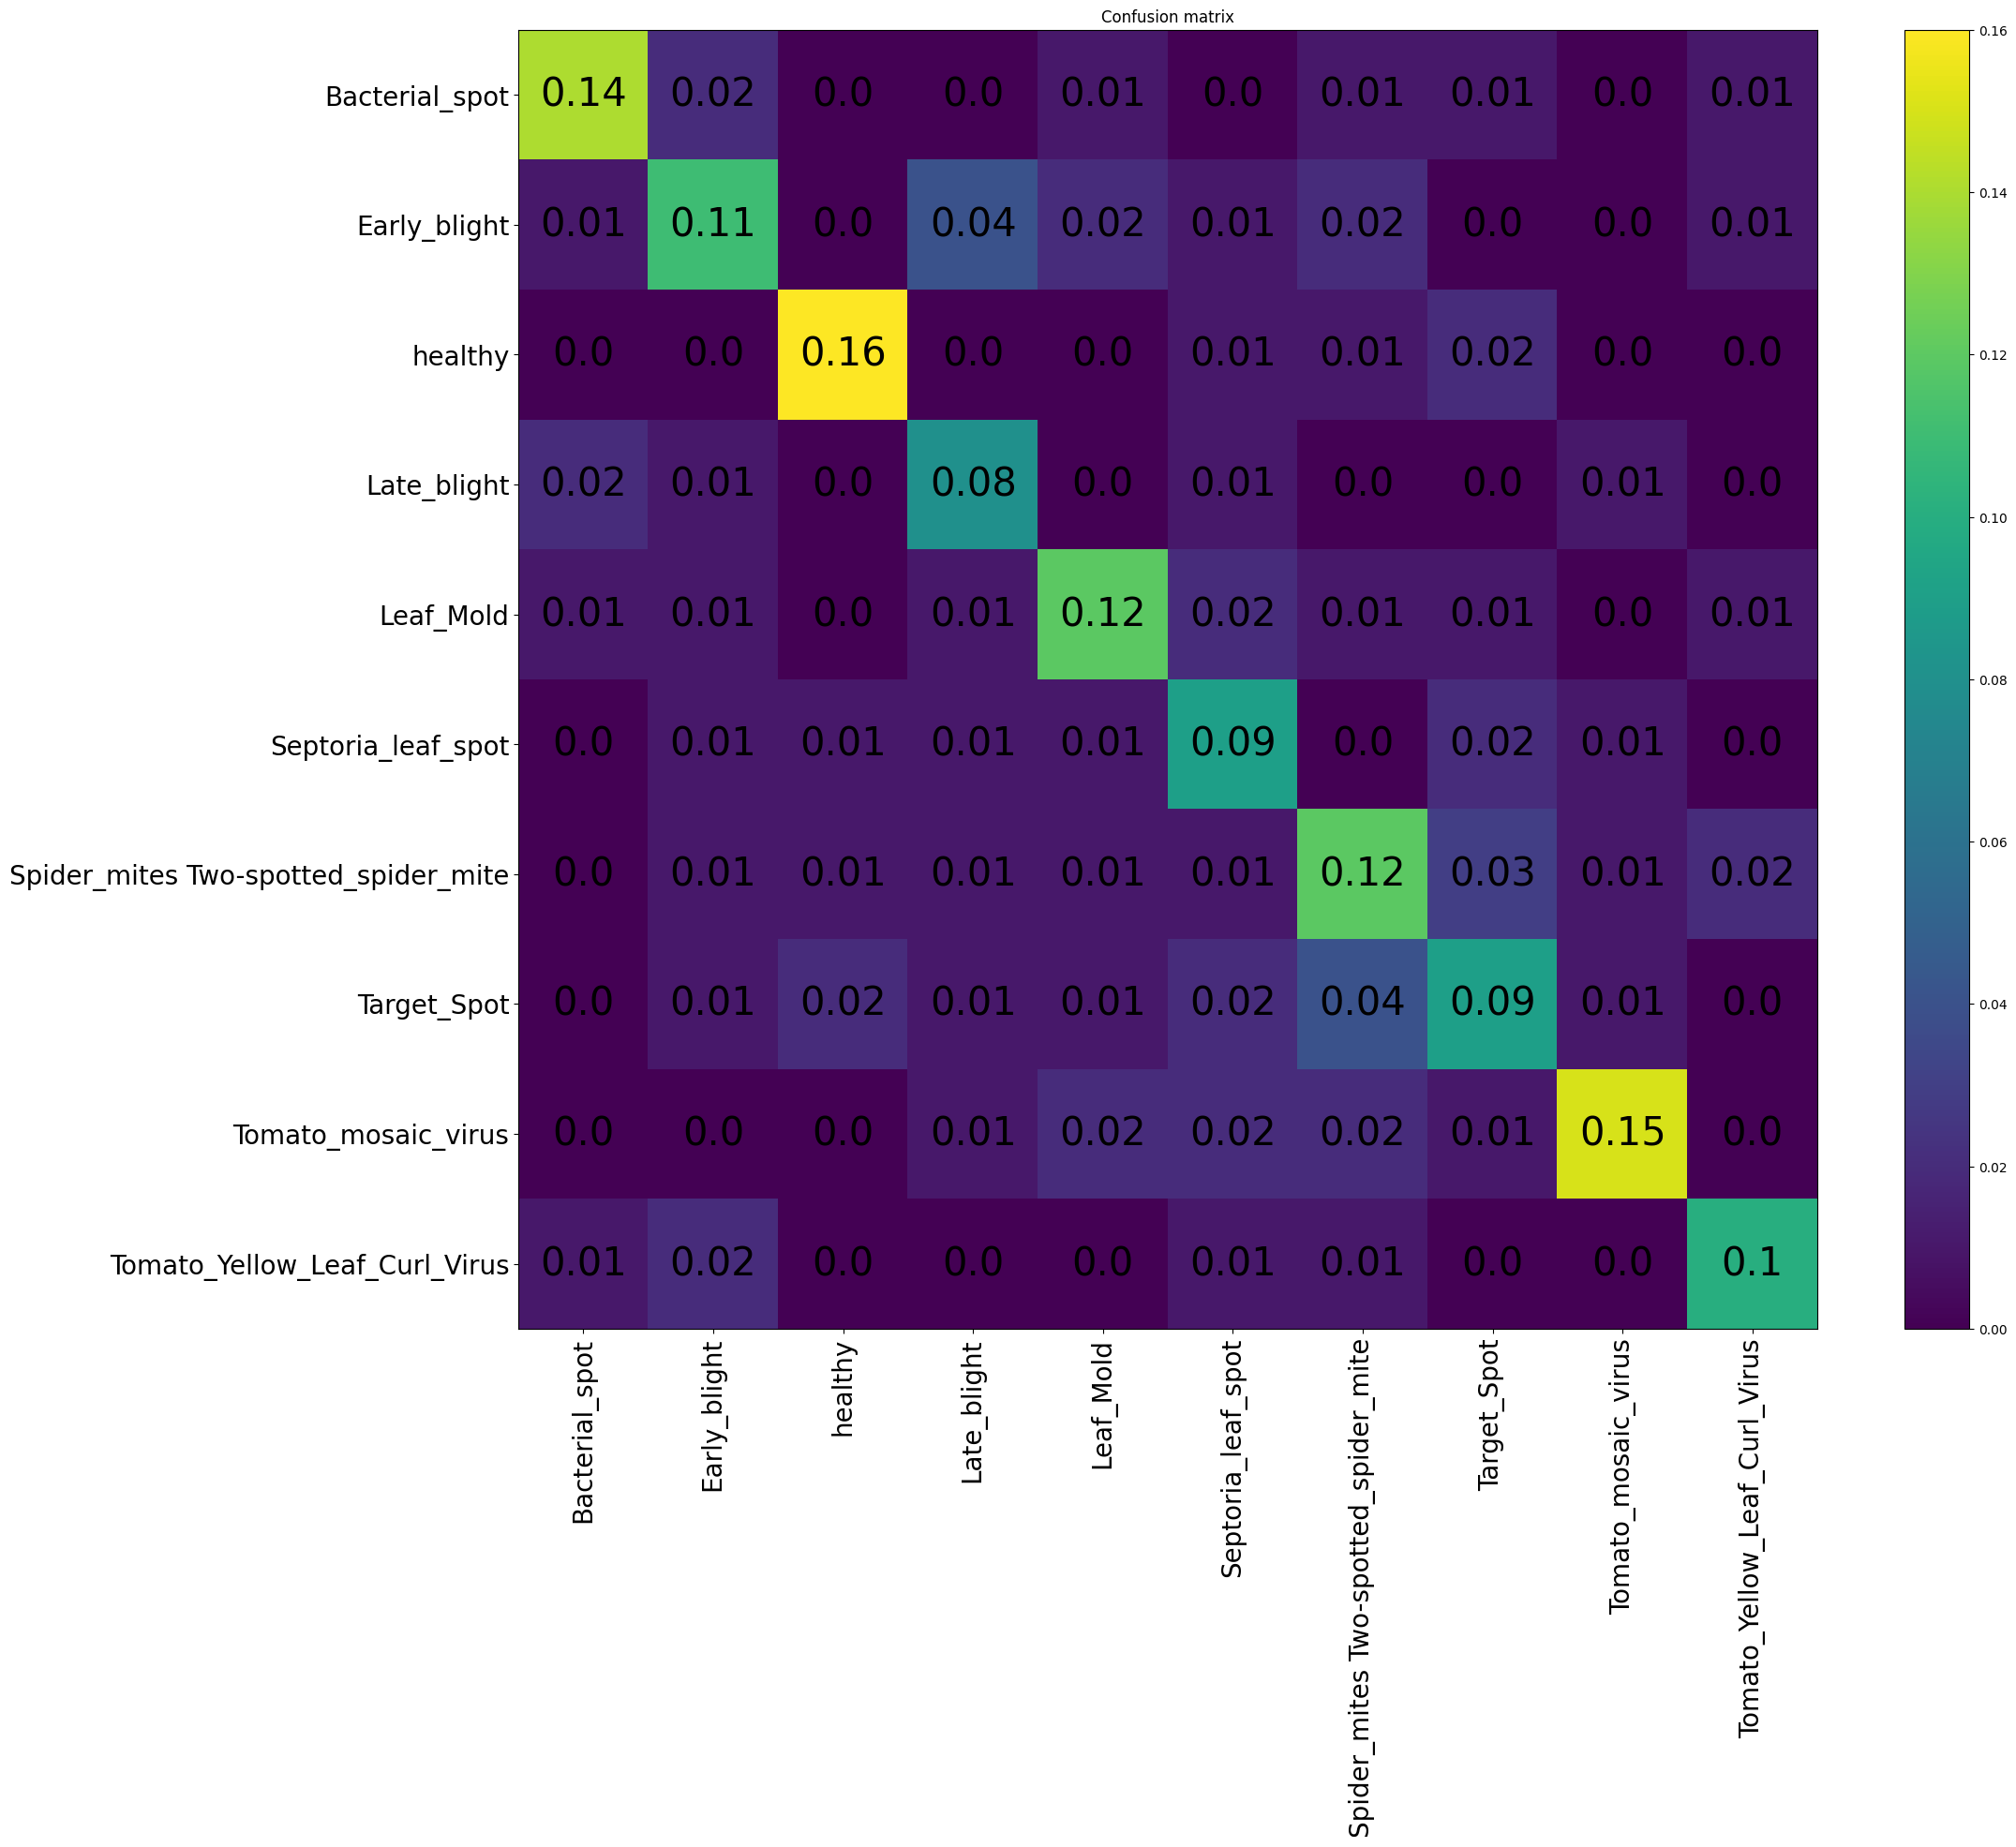

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = Xception(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = RandomForestClassifier()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


# VGG 16 and Random Forest

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 5s 16ms/step
Test accuracy: 0.7418
Precision: 0.7395
Recall: 0.7396
F1 Score: 0.7396
Plotting the confusion matrix


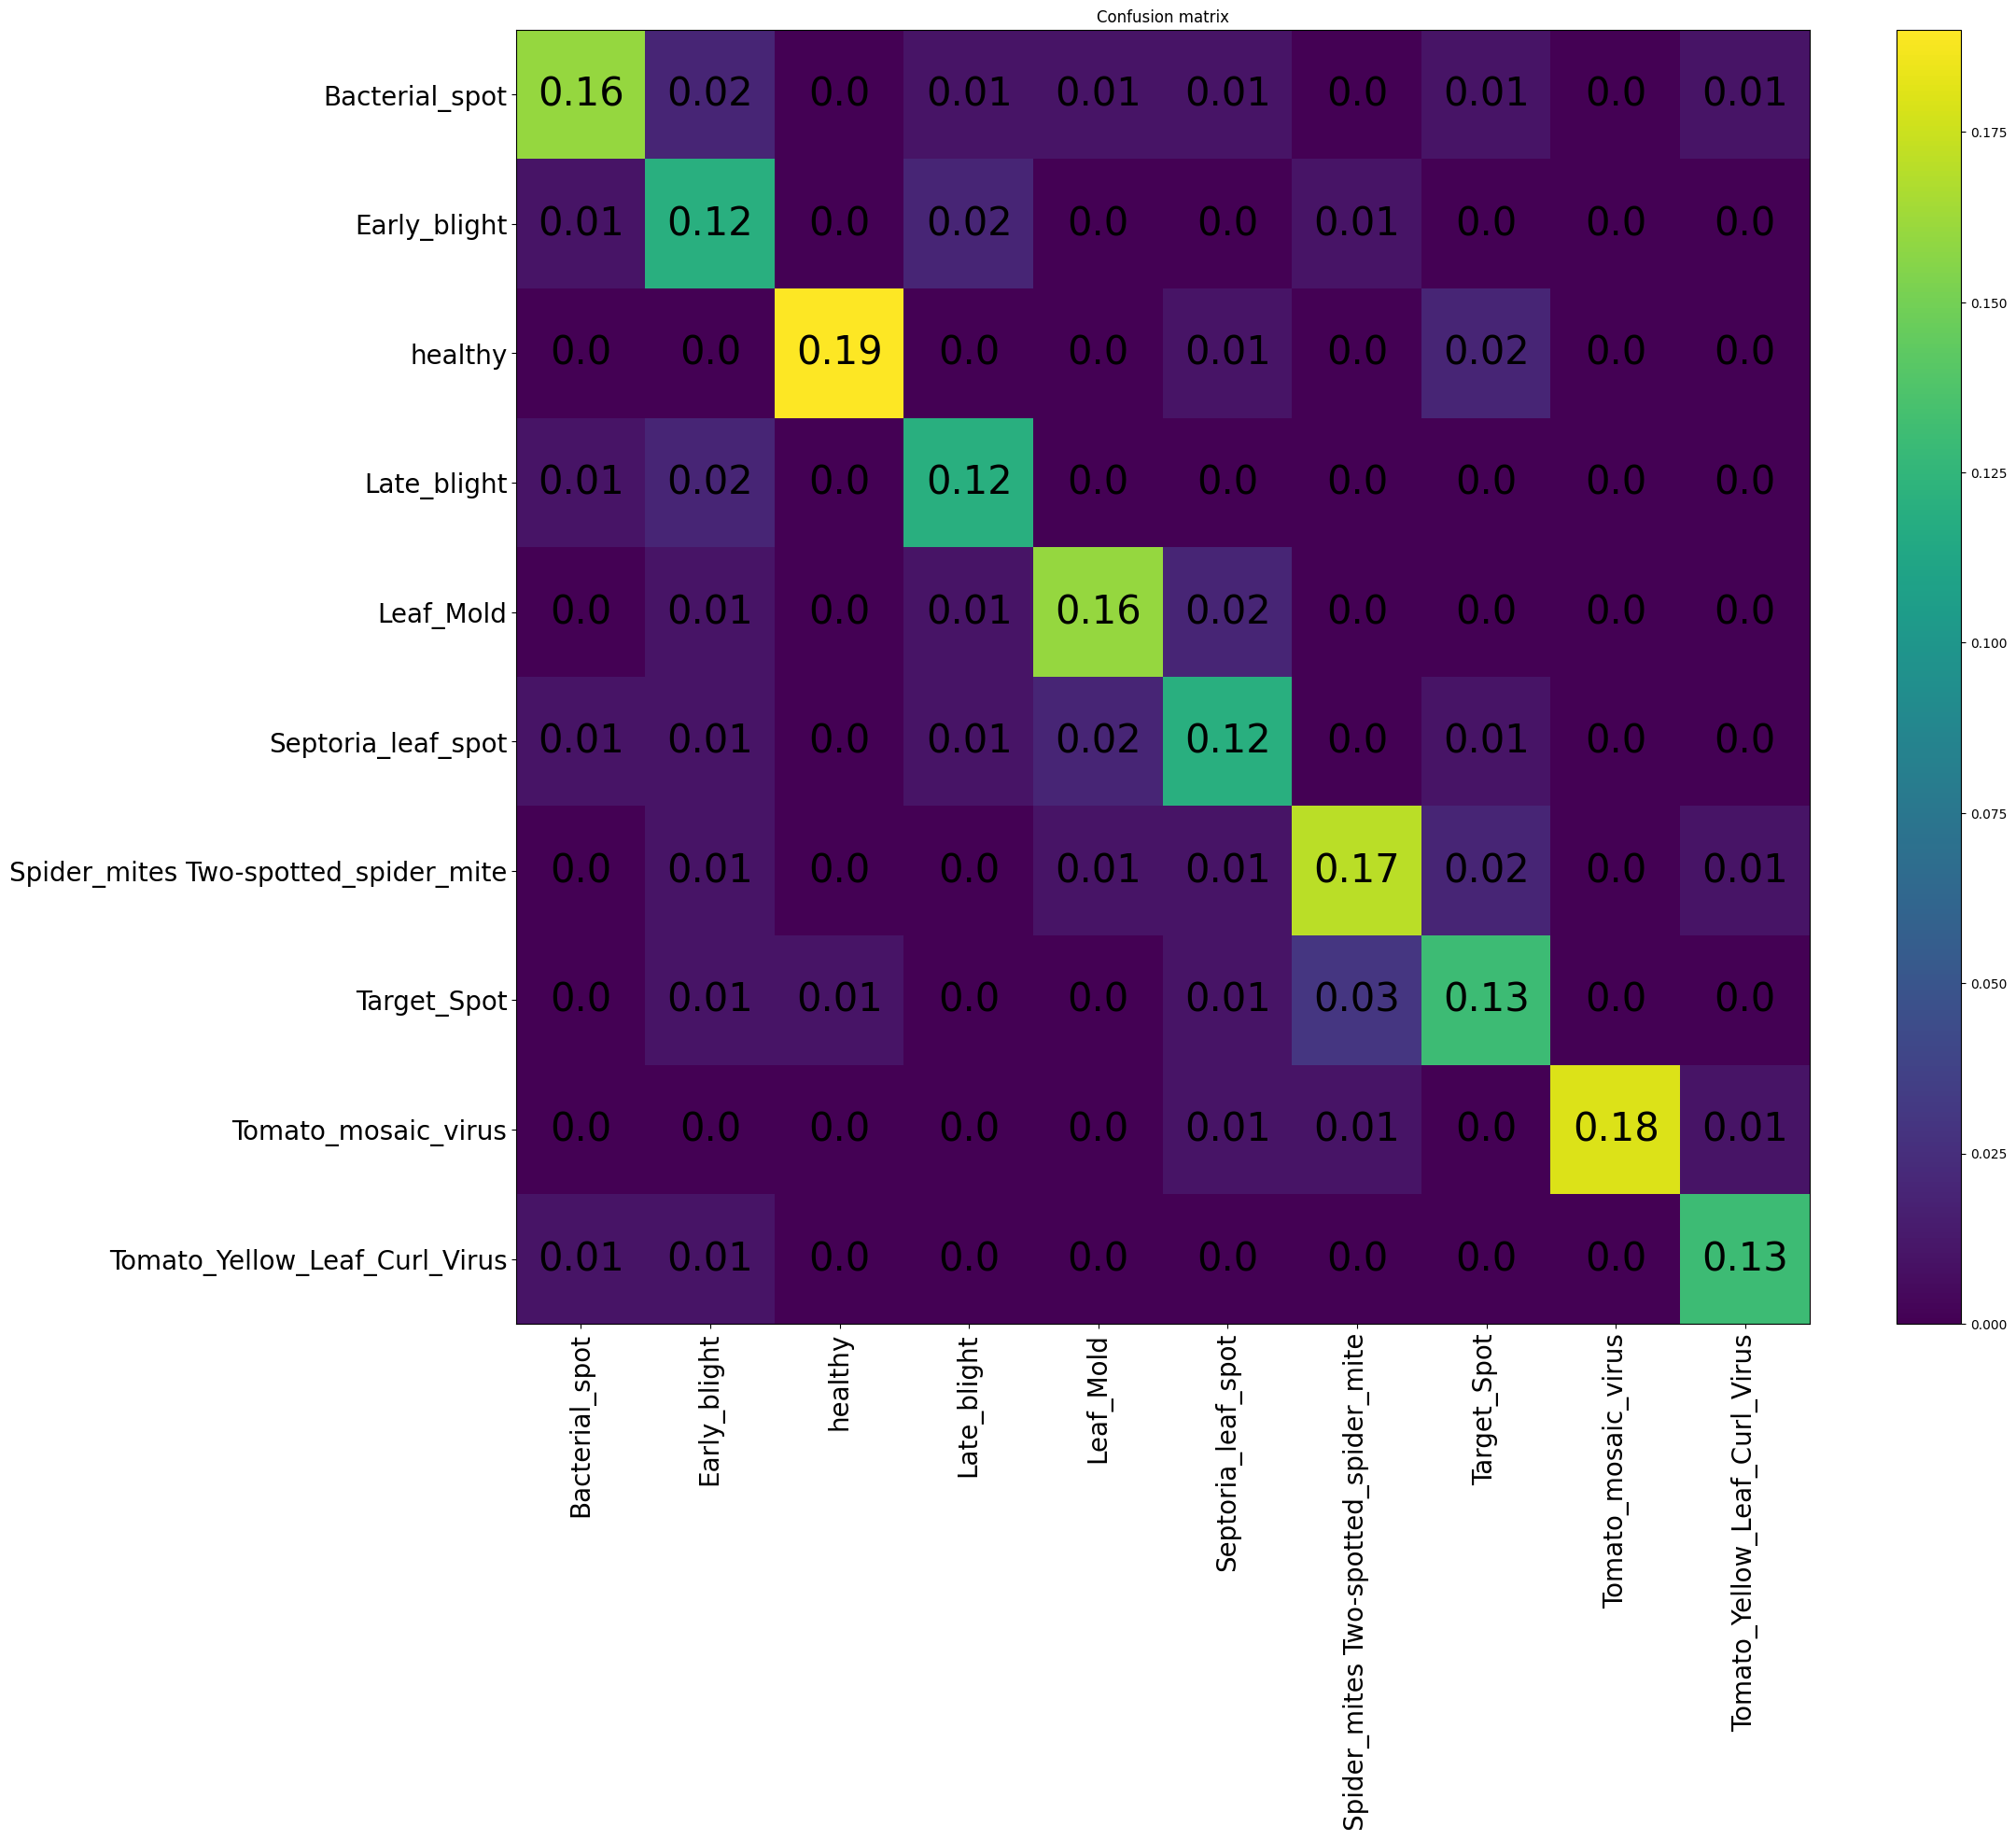

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import VGG16, VGG19
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = VGG16(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = RandomForestClassifier()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


# VGG-19 and Random Forest

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 6s 20ms/step
Test accuracy: 0.7423
Precision: 0.7420
Recall: 0.7405
F1 Score: 0.7413
Plotting the confusion matrix


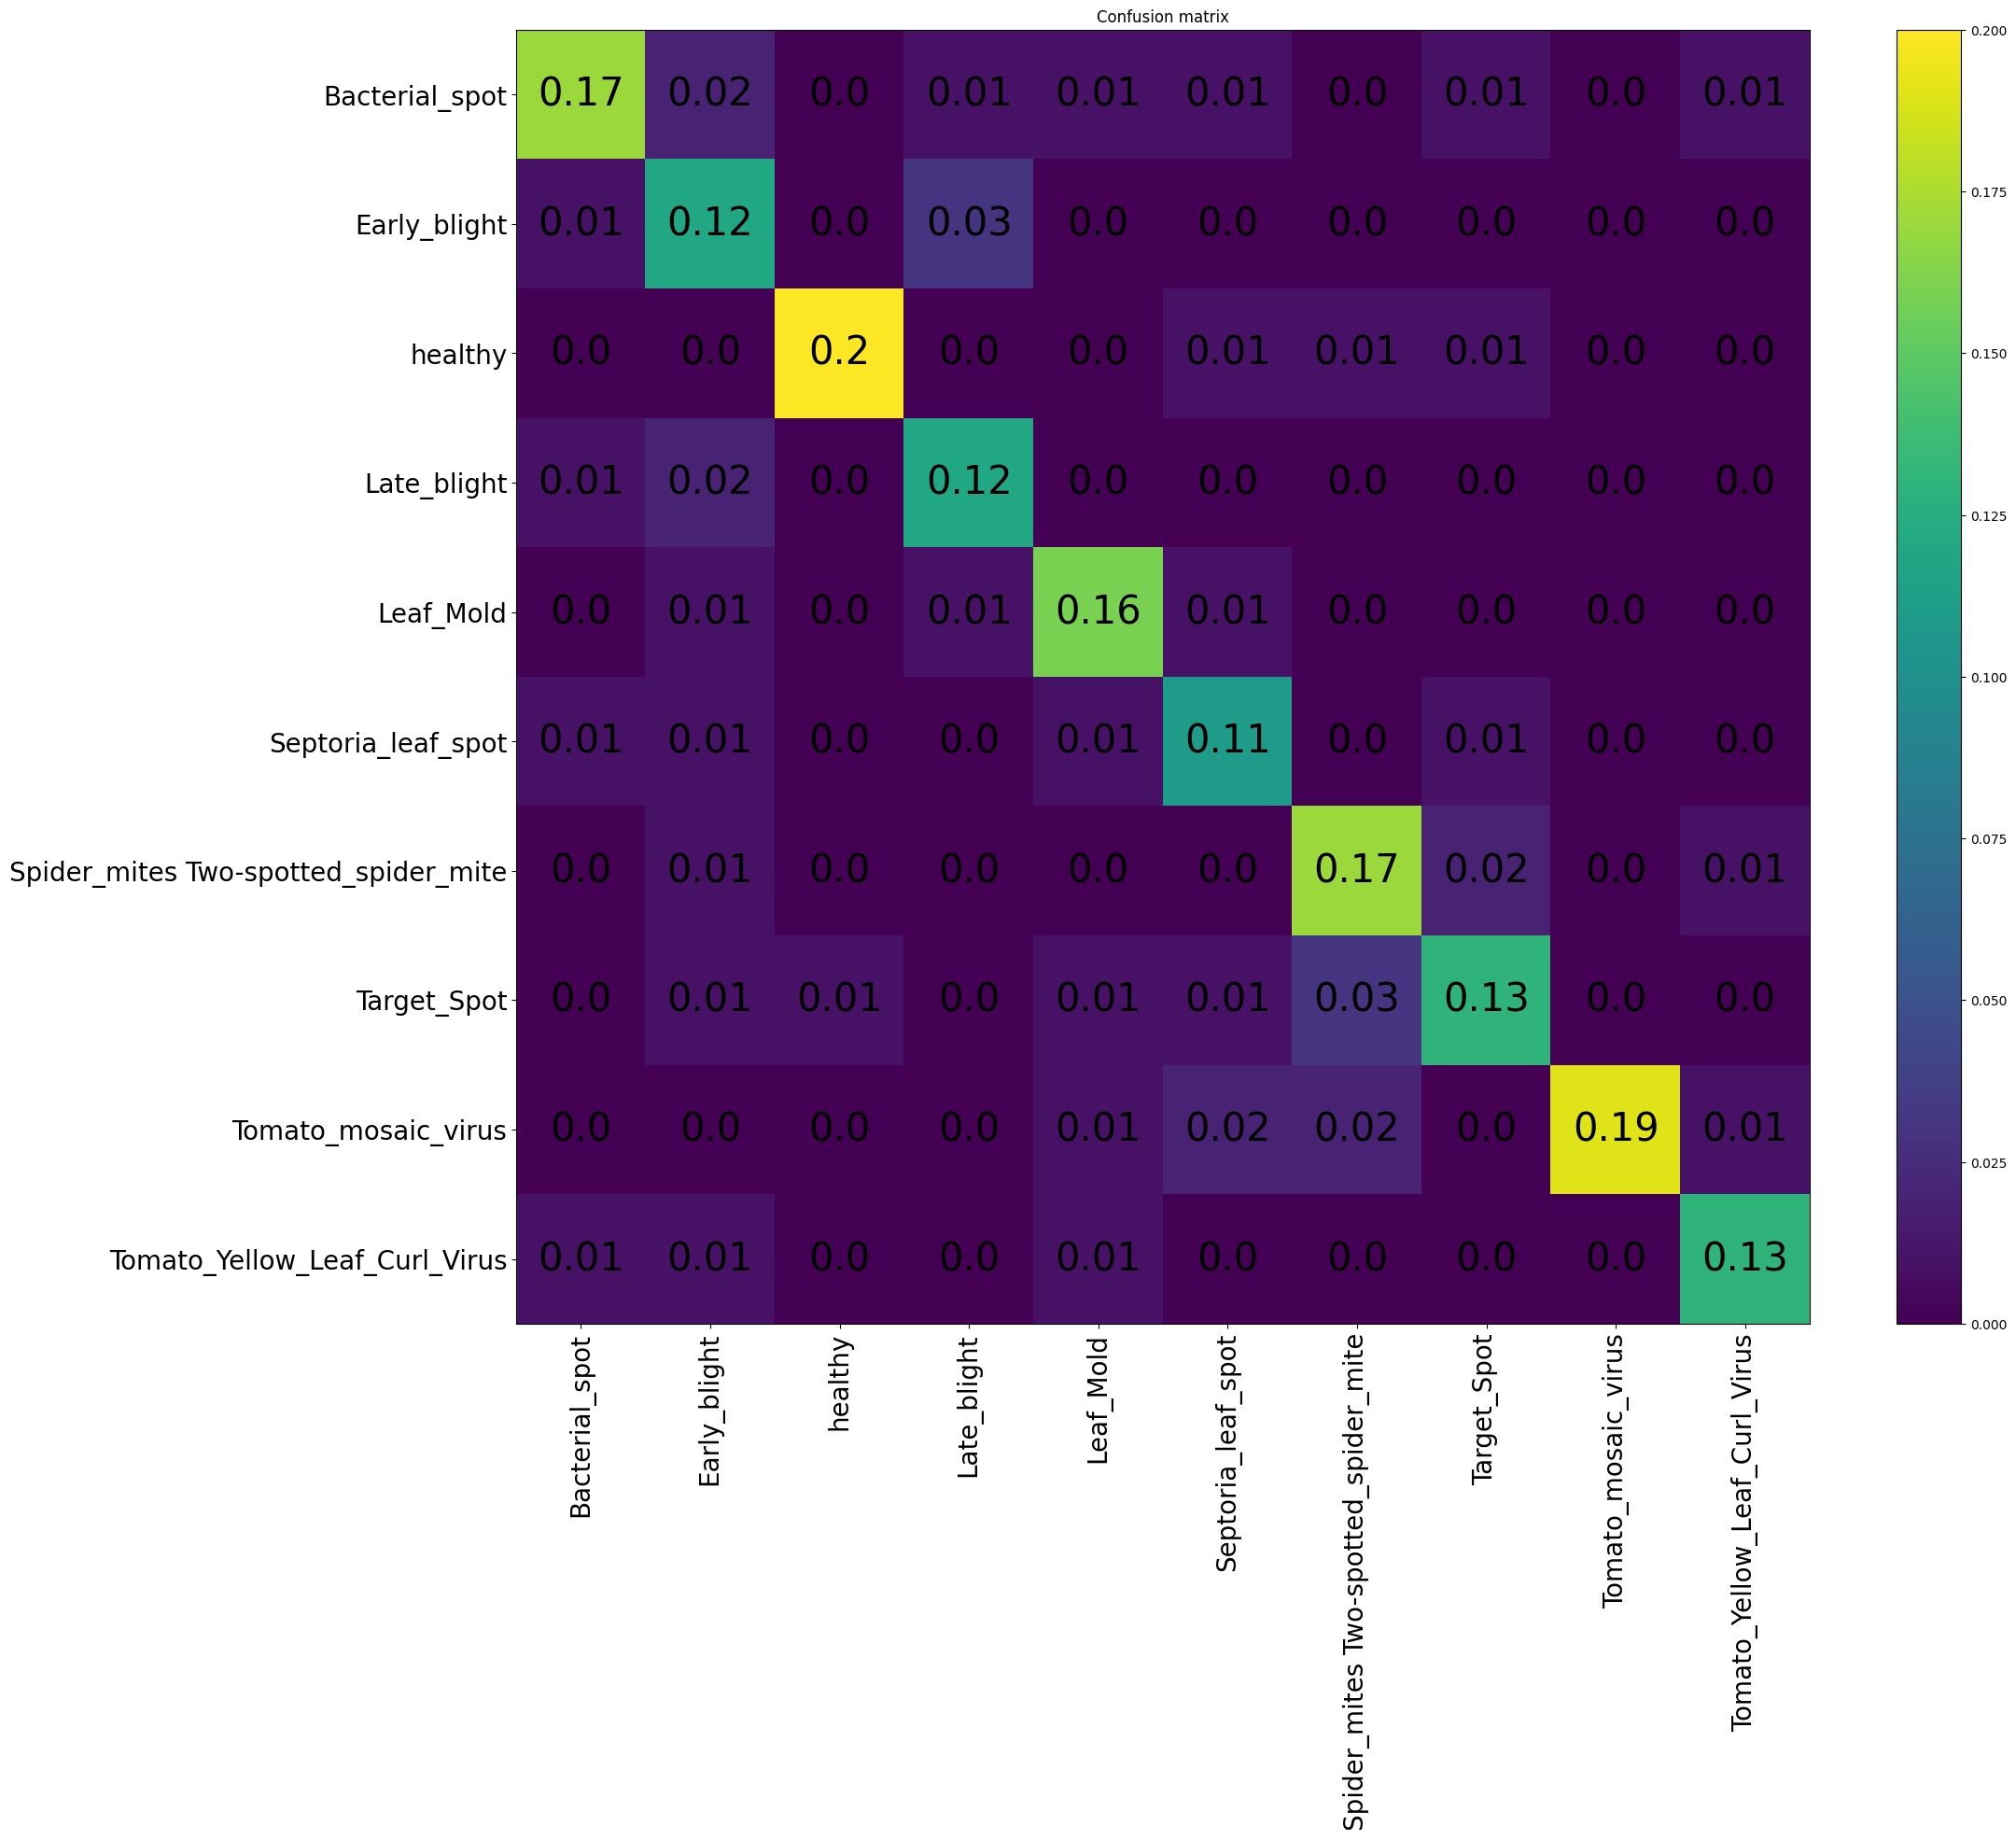

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import VGG16, VGG19
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = VGG19(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = RandomForestClassifier()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


# VGG 16 and SVC (82%)

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 5s 16ms/step
Test accuracy: 0.8285
Precision: 0.8275
Recall: 0.8271
F1 Score: 0.8273
Plotting the confusion matrix


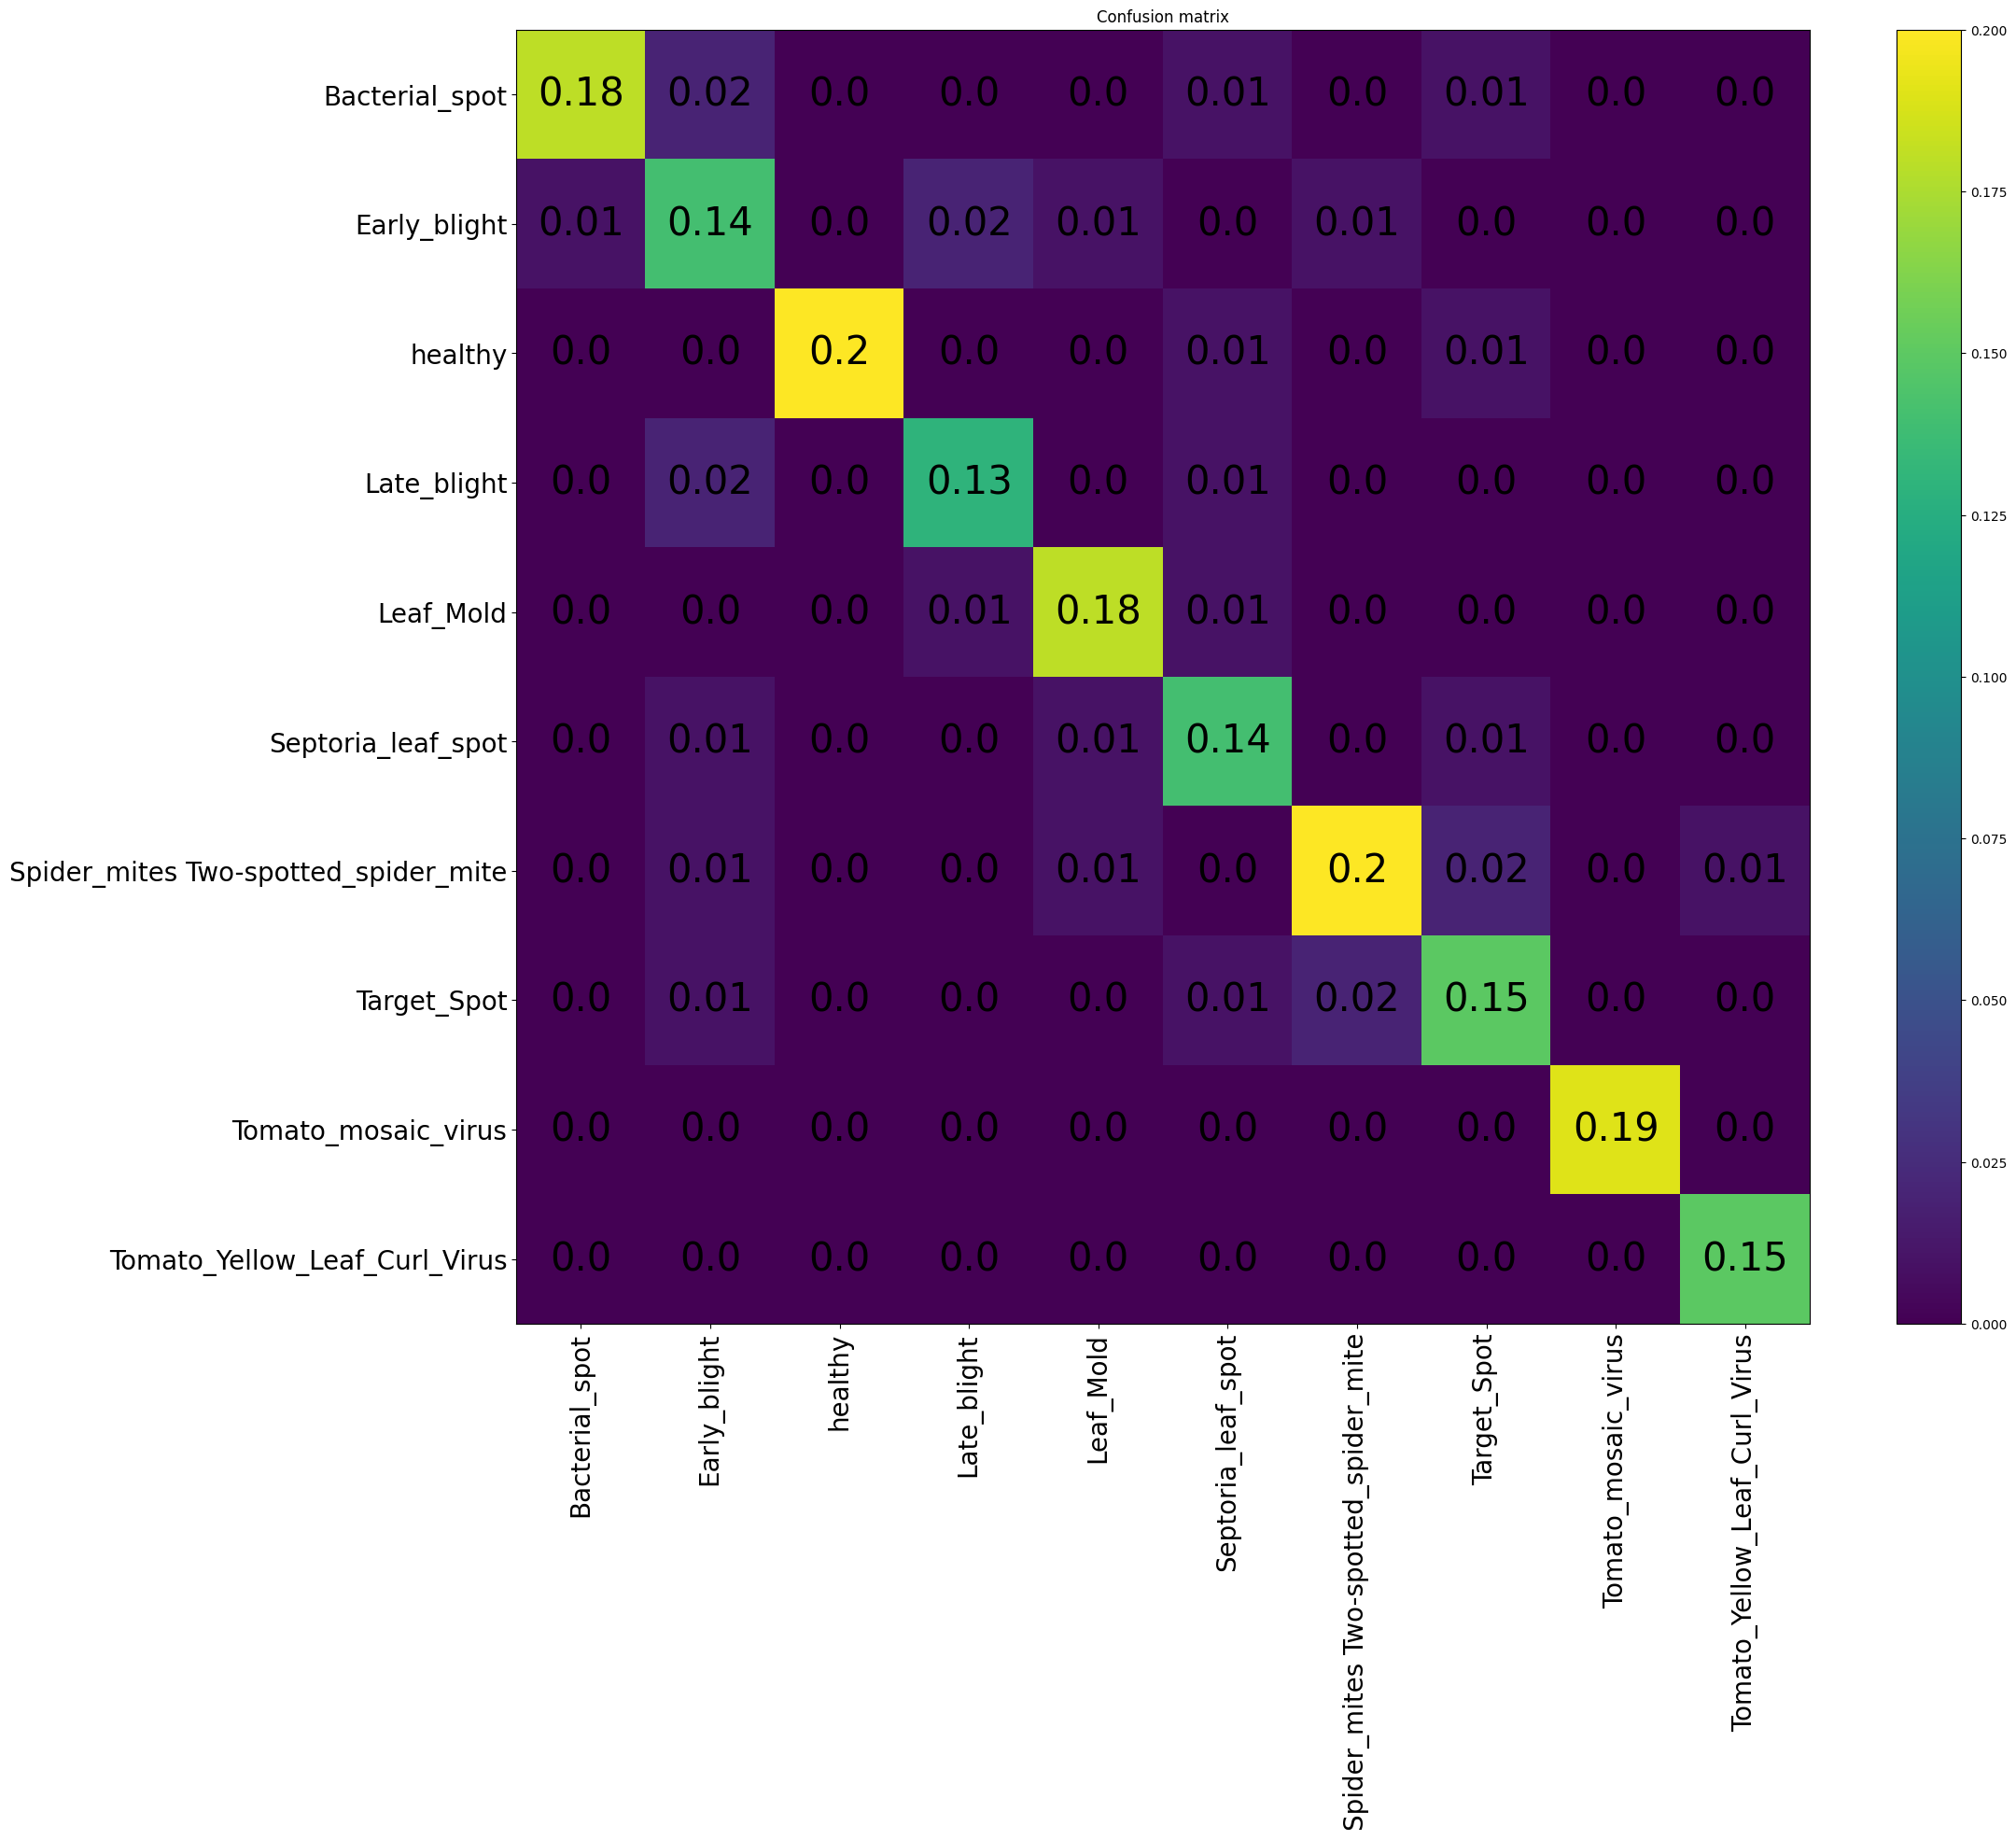

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import VGG16, VGG19
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = VGG16(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = SVC()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


# VGG19 and SVC (82%)

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 6s 19ms/step
Test accuracy: 0.8235
Precision: 0.8238
Recall: 0.8224
F1 Score: 0.8231
Plotting the confusion matrix


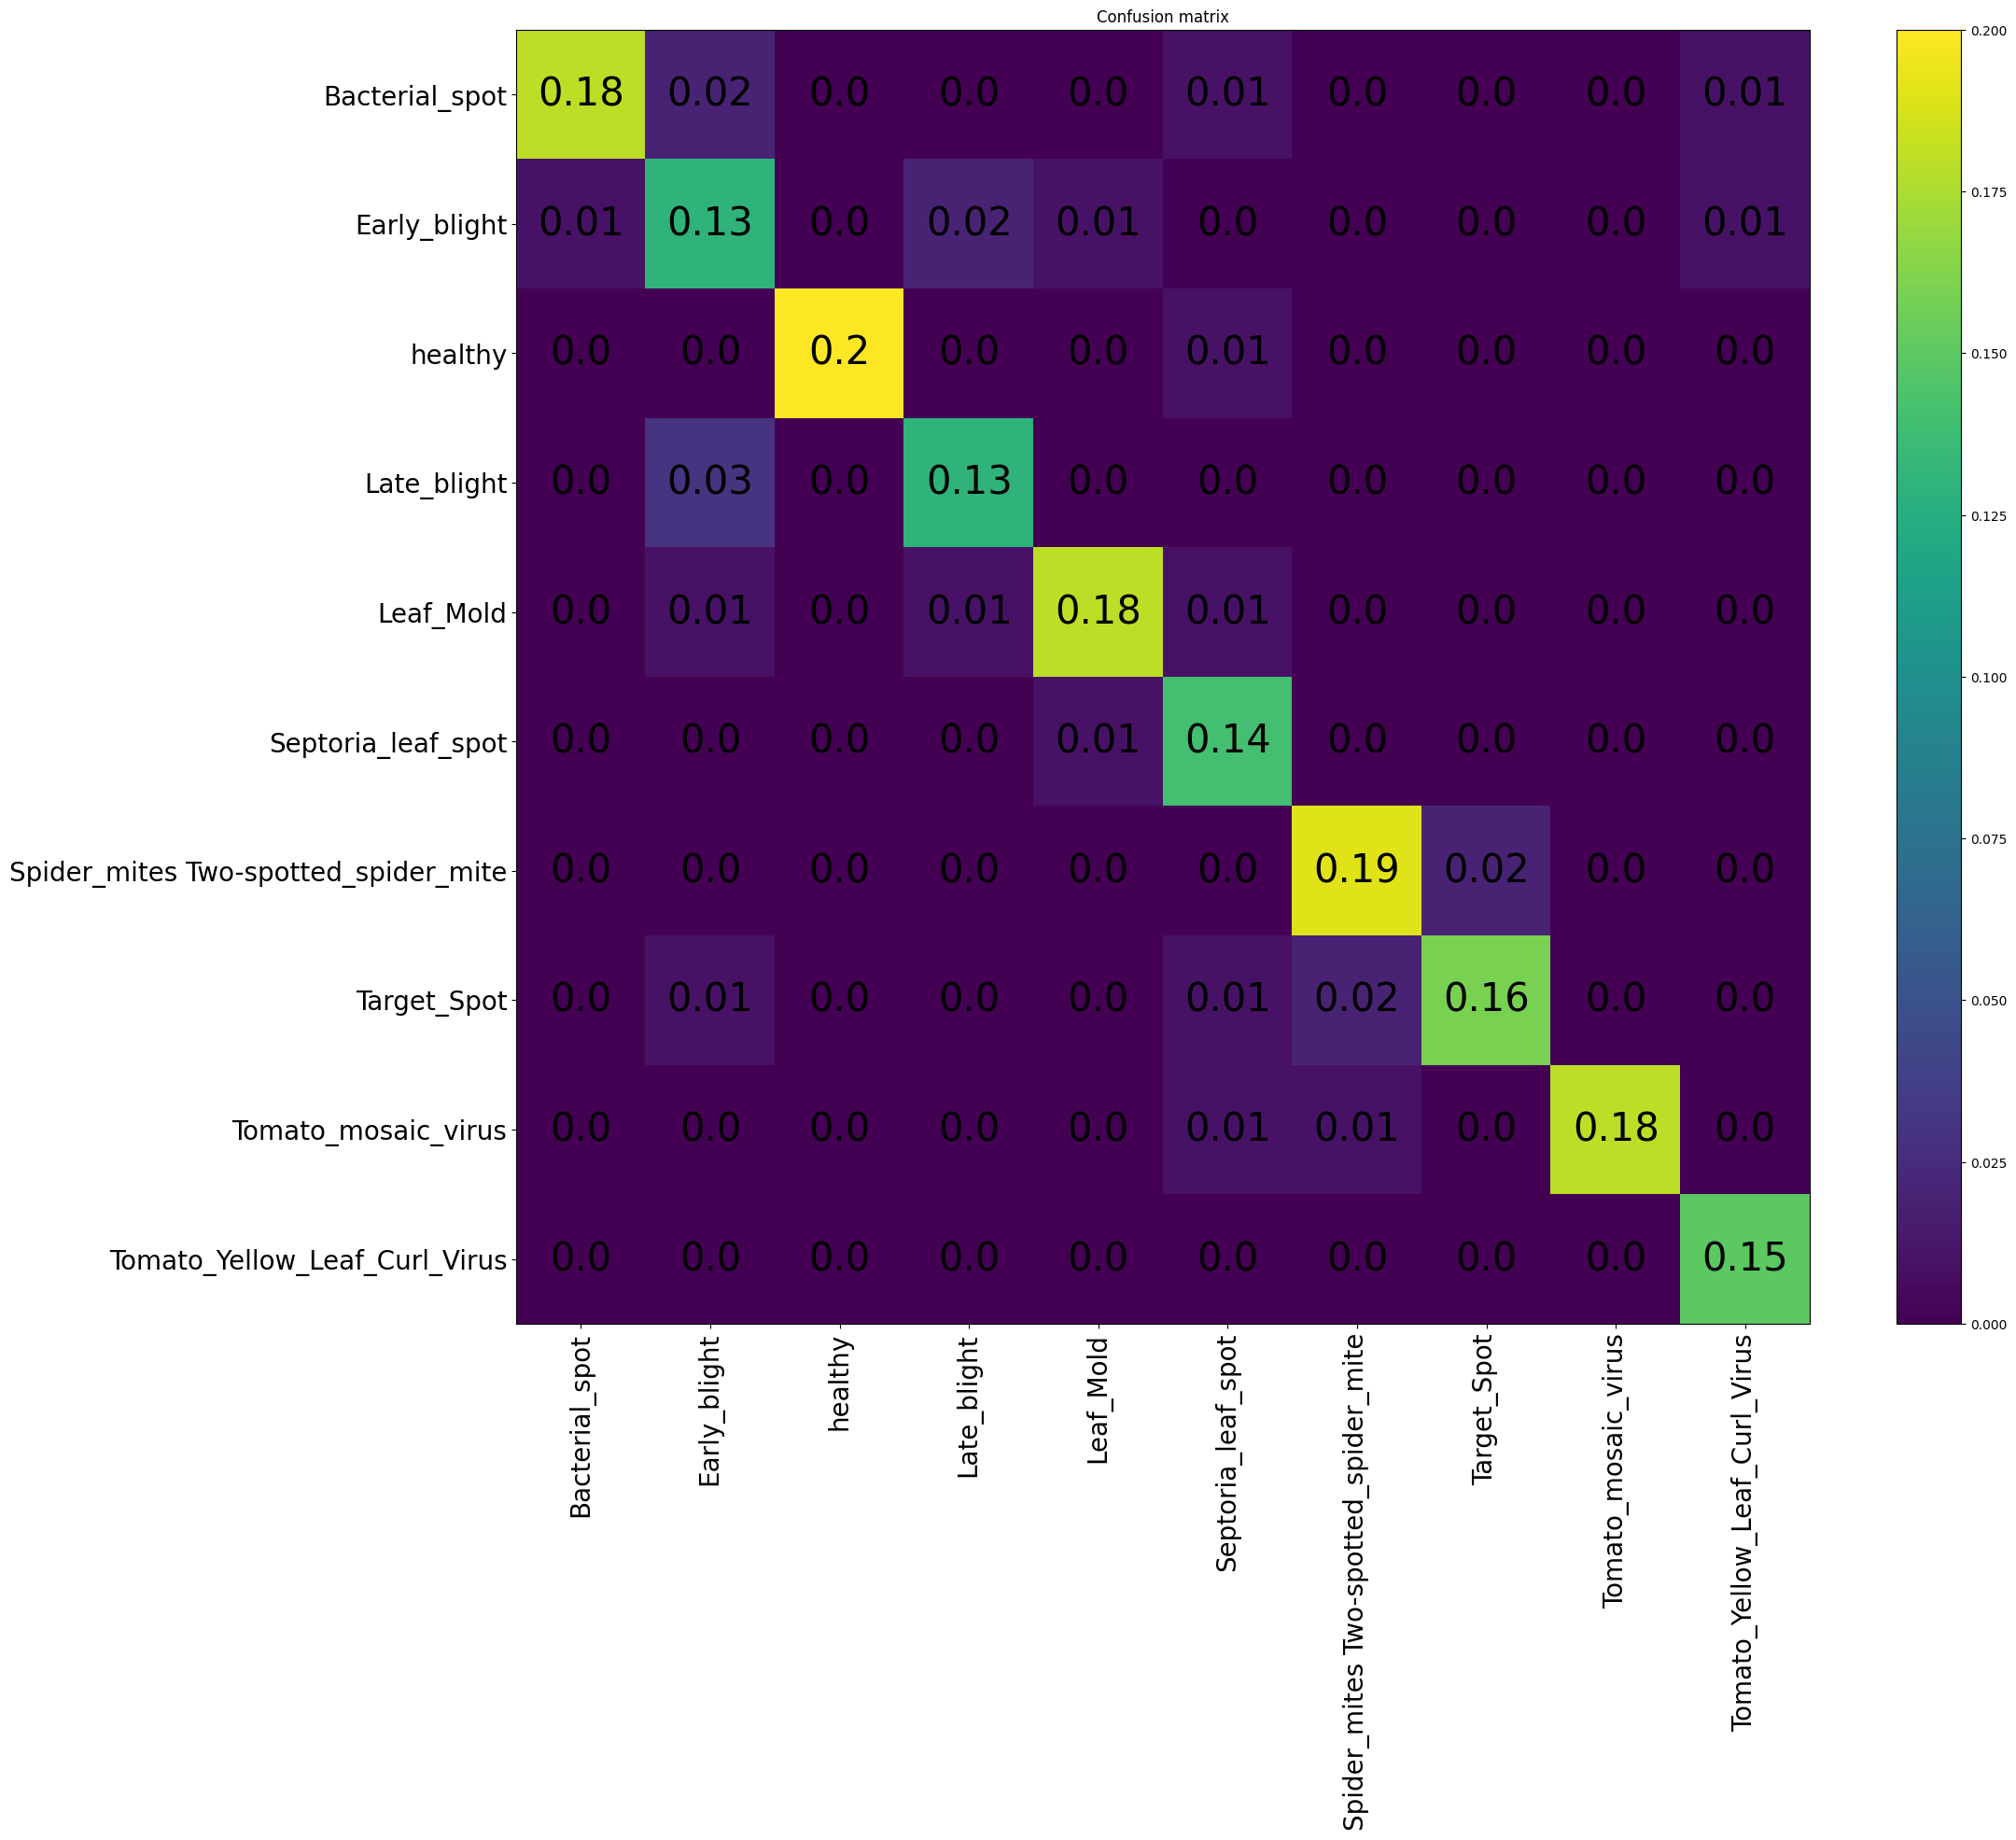

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import VGG16, VGG19
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = VGG19(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = SVC()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


# Xception and SVC

Label: 0	Family:  Bacterial_spot	Number of images: 1001
Label: 1	Family:    Early_blight	Number of images: 1000
Label: 2	Family:         healthy	Number of images: 1000
Label: 3	Family:     Late_blight	Number of images: 910
Label: 4	Family:       Leaf_Mold	Number of images: 1000
Label: 5	Family: Septoria_leaf_spot	Number of images: 1000
Label: 6	Family: Spider_mites Two-spotted_spider_mite	Number of images: 1000
Label: 7	Family:     Target_Spot	Number of images: 1000
Label: 8	Family: Tomato_mosaic_virus	Number of images: 1000
Label: 9	Family: Tomato_Yellow_Leaf_Curl_Virus	Number of images: 1000
Processing images ...
Images processed: 9911
310/310 [==============================] - 6s 18ms/step
Test accuracy: 0.6455
Precision: 0.6461
Recall: 0.6416
F1 Score: 0.6438
Plotting the confusion matrix


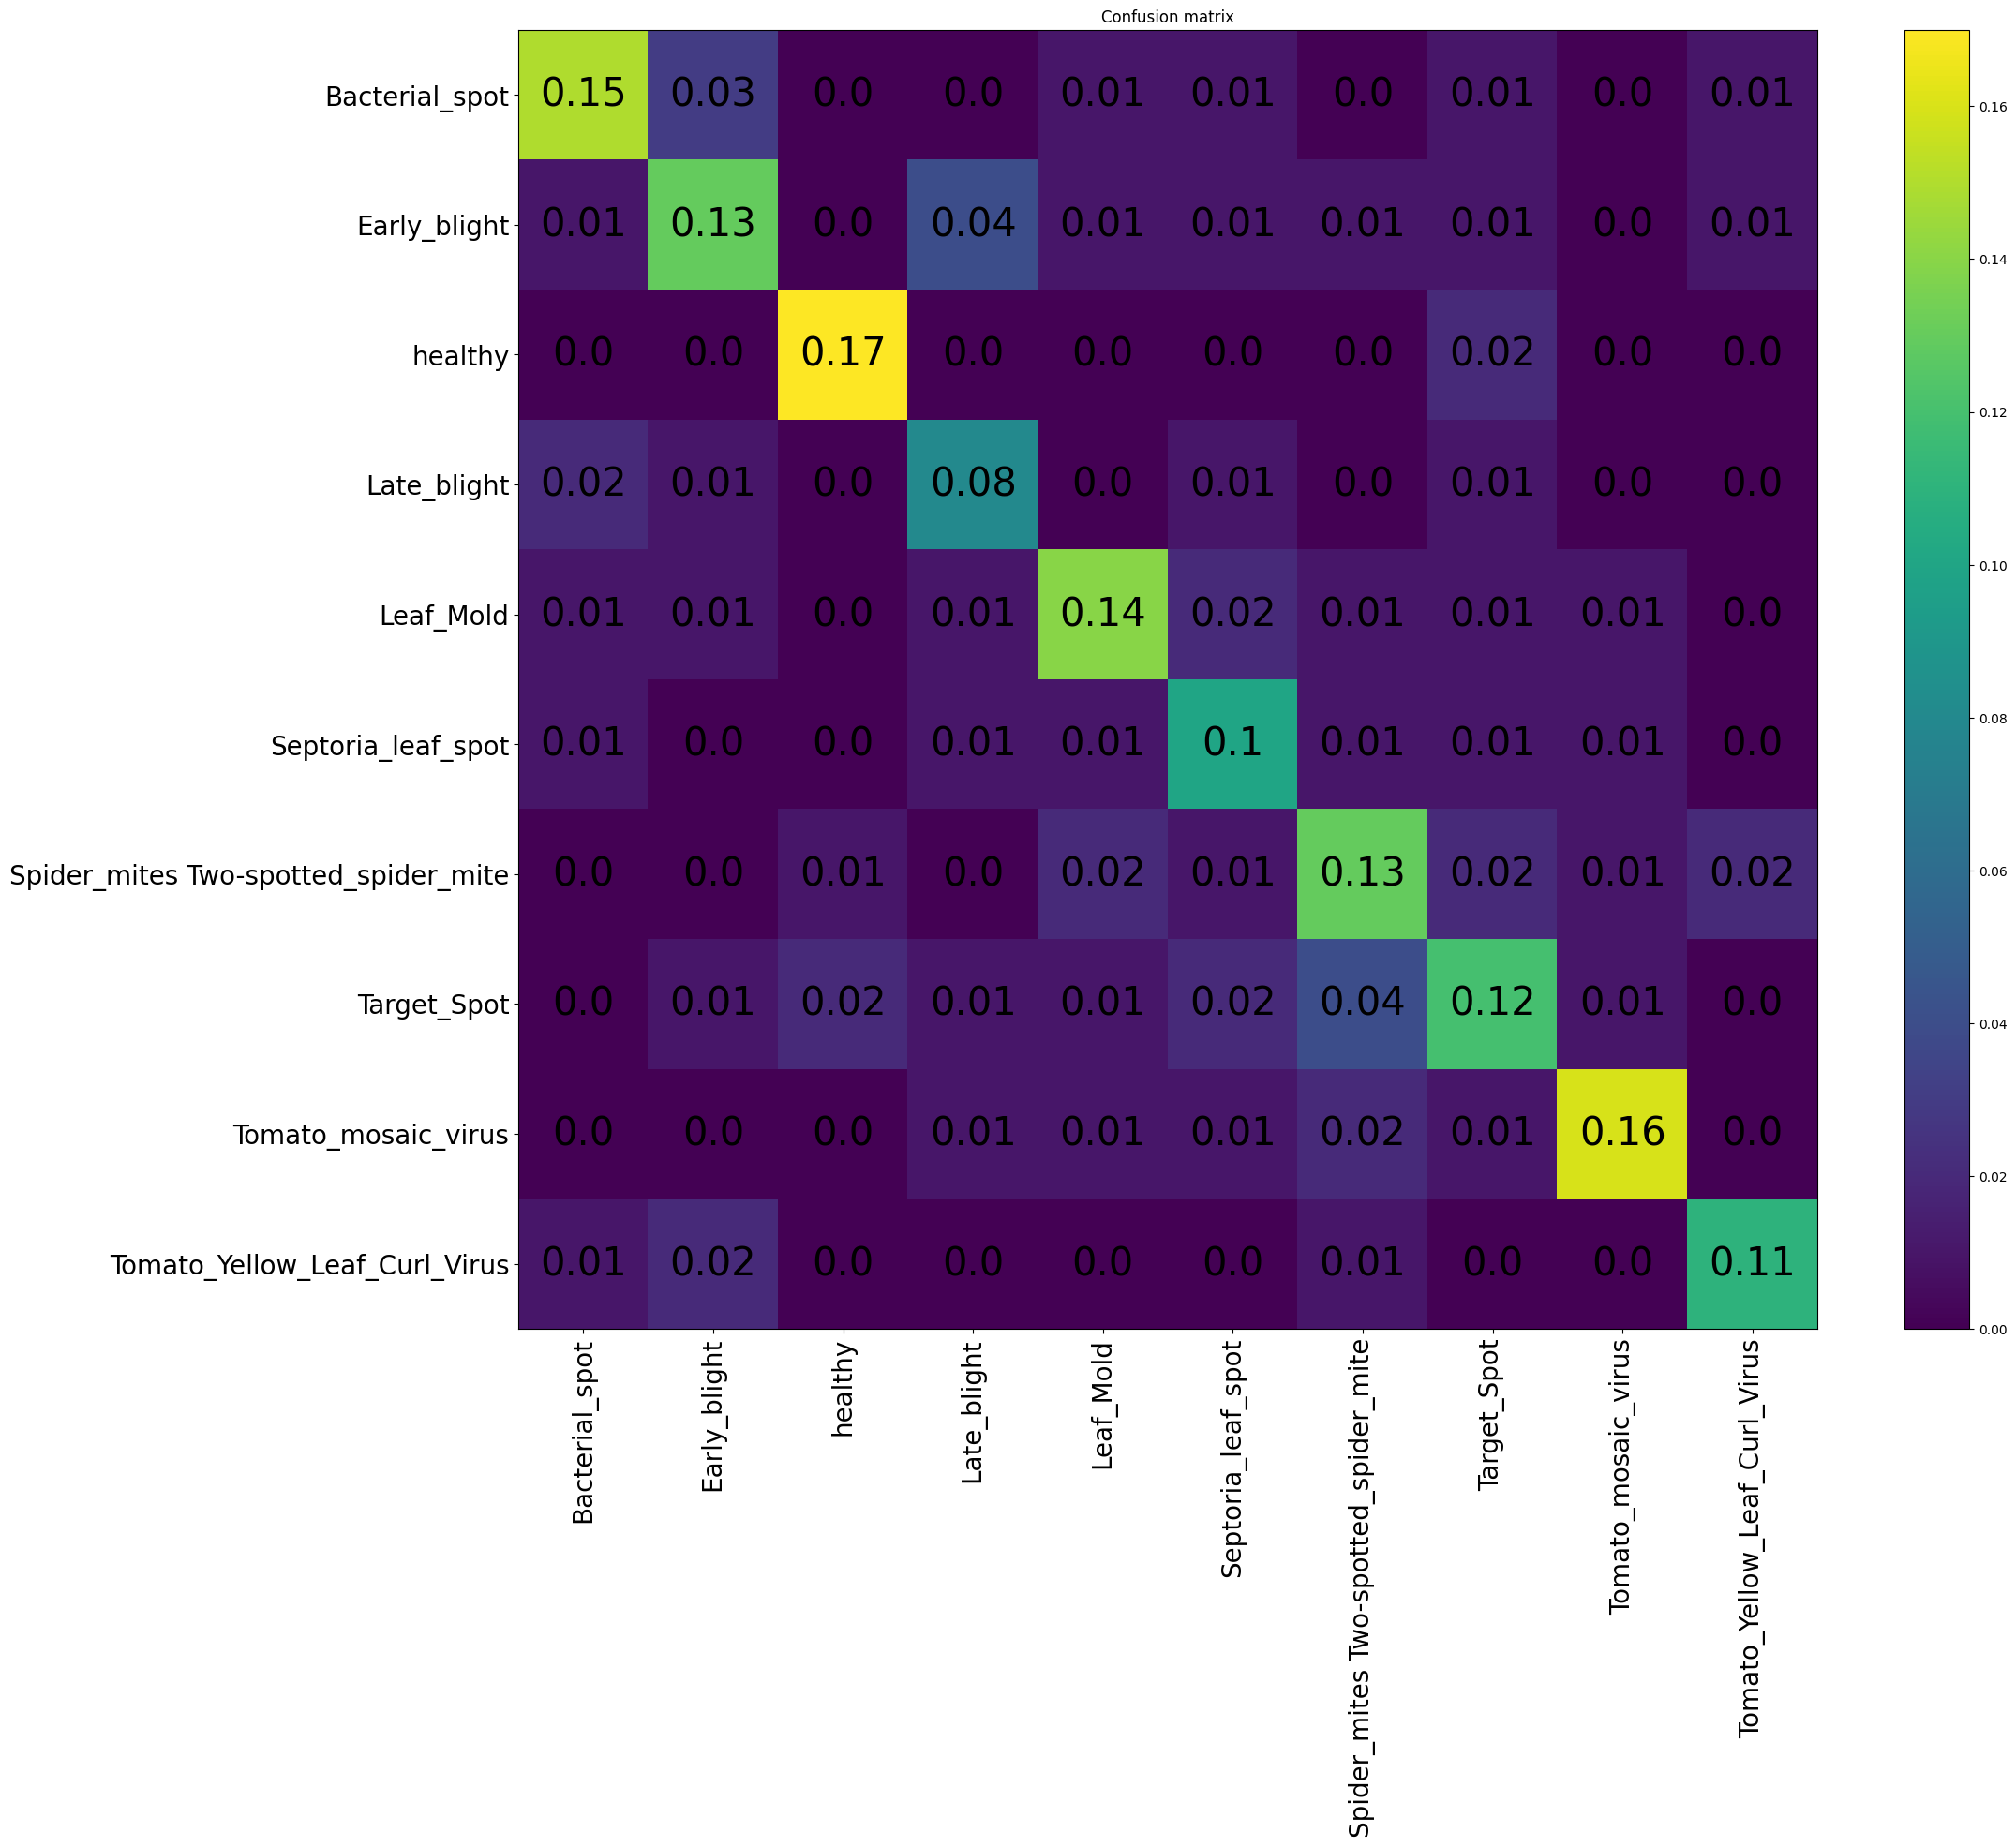

In [ ]:
import os
import os.path
import glob
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import VGG16, VGG19
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

import numpy as np
np.random.seed(1)

import random
from skimage import io
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.xception import Xception

imagedir = "/content/dataset/train"

cur_dir = os.getcwd()
os.chdir(imagedir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)
no_imgs = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.JPG'))  # assuming the images are stored as 'png'
    no_imgs.append(len1)
    os.chdir('..')
num_samples = np.sum(no_imgs)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_imgs:
    print ("Label:%2d\tFamily: %15s\tNumber of images: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height, channels = (71, 71, 3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
list_paths = []  # List of image paths
print("Processing images ...")
for i in range(len(list_fams)):
    for img_file in glob.glob(list_fams[i] + '/*.JPG'):
        list_paths.append(os.path.join(os.getcwd(), img_file))
        img = image.load_img(img_file, target_size=(71, 71))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X[cnt] = x
        cnt += 1
print("Images processed: %d" % (cnt))

os.chdir(cur_dir)

X.shape

# Encoding classes (y) into integers (y_encoded) and then generating one-hot-encoding (Y)
encoder = LabelEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y)
Y = to_categorical(y_encoded)

# Creating base_model (Xception notop)
image_shape = (71, 71, 3)
base_model = Xception(weights='imagenet', input_shape=image_shape, include_top=False)

xception_features = base_model.predict(X)
xception_features.shape

xception_features = np.reshape(xception_features, (xception_features.shape[0], -1))
xception_features.shape

# Create a single train-test split
X_train, X_test, y_train, y_test = train_test_split(xception_features, y, test_size=0.2, random_state=1)  # Adjust the test_size as needed

top_model = SVC()
top_model.fit(X_train, y_train)  # Training
y_pred = top_model.predict(X_test)  # Testing

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='macro')
f1 = 2 * (pre * rec) / (pre + rec)

print("Test accuracy: %.4f" % acc)
print("Precision: %.4f" % pre)
print("Recall: %.4f" % rec)
print("F1 Score: %.4f" % f1)

# Viewing the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)  # Compute confusion matrix for this fold

# Plot the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat / no_imgs  # Normalizing the confusion matrix

print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm, decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat, interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]), xy=(col, row), ha='center', va='center', fontsize=30)
plt.xticks(range(len(list_fams)), list_fams, rotation=90, fontsize=20)
plt.yticks(range(len(list_fams)), list_fams, fontsize=20)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()
